# OESON Project 3&4

This project will have four key sections. They Are:
- Data Pre-processing
- Exploratory Data Analysis (EDA)
- Machine Learning (ML)

In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

from pandas_profiling import ProfileReport

## Data Pre-processing

In [2]:
student_academic = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\OESON Data Science Internship\Internship Project 3\Student_academic.csv")
student_academic

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

In [3]:
student_academic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
def data_inspection(df):
    null = df.isnull().sum()
    duplicate = df.duplicated().sum()
    percentage_null = 100*(null/len(df))
    data_type = df.dtypes
    unique = df.nunique()
    return pd.DataFrame({"Duplicated Values": duplicate,
                         "Null Values": null,
                         "Percentage of Null Values": percentage_null,
                         "Unique Values": unique,
                         "Data Type": data_type})

In [5]:
data_inspection(student_academic)

Duplicated Values  \
Marital status                                                  0   
Application mode                                                0   
Application order                                               0   
Course                                                          0   
Daytime/evening attendance                                      0   
Previous qualification                                          0   
Nacionality                                                     0   
Mother's qualification                                          0   
Father's qualification                                          0   
Mother's occupation                                             0   
Father's occupation                                             0   
Displaced                                                       0   
Educational special needs                                       0   
Debtor                                                          0   
Tuition fees up to date                                         0   
Gender                                                          0   
Scholarship holder                                              0   
Age at enrollment                                               0   
International                                                   0   
Curricular units 1st sem (credited)                             0   
Curricular units 1st sem (enrolled)                             0   
Curricular units 1st sem (evaluations)                          0   
Curricular units 1st sem (approved)                             0   
Curricular units 1st sem (grade)                                0   
Curricular units 1st sem (without evaluations)                  0   
Curricular units 2nd sem (credited)                             0   
Curricular units 2nd sem (enrolled)                             0   
Curricular units 2nd sem (evaluations)                          0   
Curricular units 2nd sem (approved)                             0   
Curricular units 2nd sem (grade)                                0   
Curricular units 2nd sem (without evaluations)                  0   
Unemployment rate                                               0   
Inflation rate                                                  0   
GDP                                                             0   
Target                                                          0   

                                                Null Values  \
Marital status                                            0   
Application mode                                          0   
Application order                                         0   
Course                                                    0   
Daytime/evening attendance                                0   
Previous qualification                                    0   
Nacionality                                               0   
Mother's qualification                                    0   
Father's qualification                                    0   
Mother's occupation                                       0   
Father's occupation                                       0   
Displaced                                                 0   
Educational special needs                                 0   
Debtor                                                    0   
Tuition fees up to date                                   0   
Gender                                                    0   
Scholarship holder                                        0   
Age at enrollment                                         0   
International                                             0   
Curricular units 1st sem (credited)                       0   
Curricular units 1st sem (enrolled)                       0   
Curricular units 1st sem (evaluations)                    0   
Curricular units 1st sem (approved)                       0   
Curricular units 1st sem (grade)                   

In [6]:
# We remove the data of students which have enrolled, since we are only comparing students who have graduated to
# students who have dropped out. Enrolled data can be used as prediction data.
student_academic["Target"].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [12]:
student_academic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

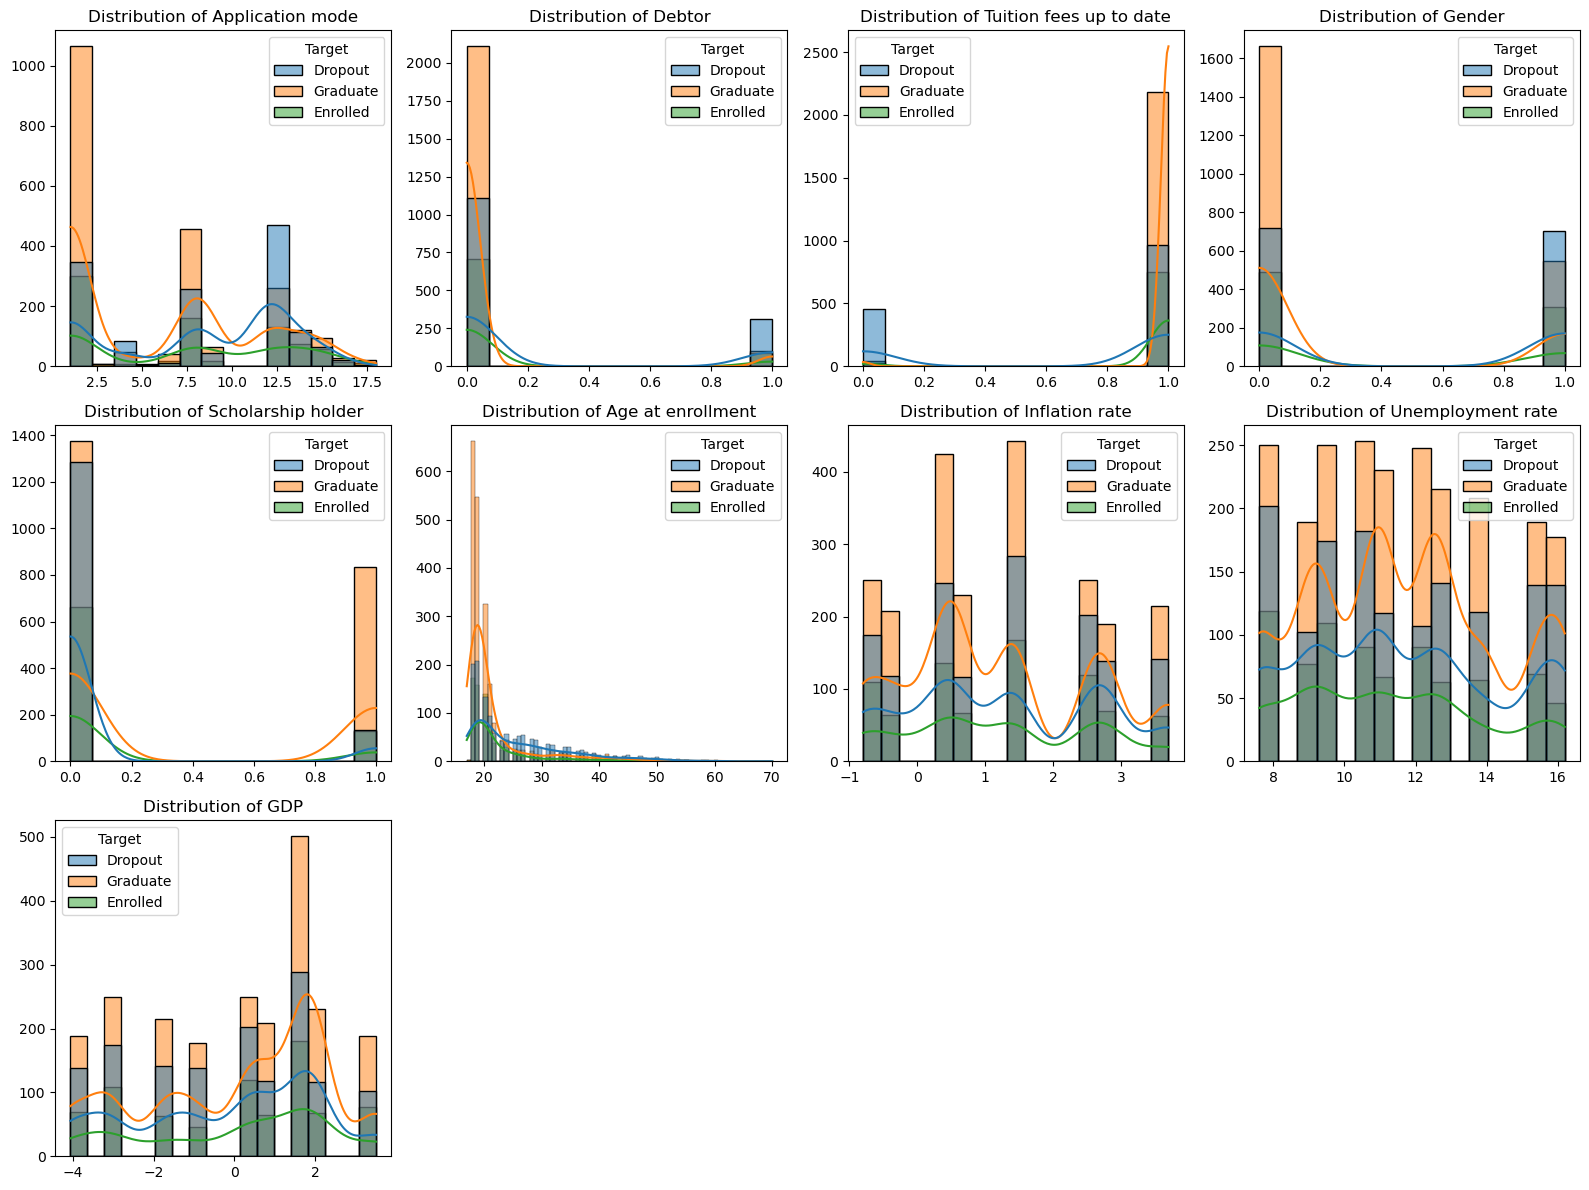

In [23]:
# Select the relevant columns from the DataFrame
student_academic_df = student_academic[['Application mode', "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "Age at enrollment", "Inflation rate", "Unemployment rate", "GDP", "Target"]]

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the columns and create distribution plots
for i, column in enumerate(student_academic_df.columns[:-1]):  # Exclude the "Target" column
    sns.histplot(data=student_academic_df, x=column, hue="Target", ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused subplots
for j in range(len(student_academic_df.columns) - 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show plots
plt.tight_layout()
plt.show()

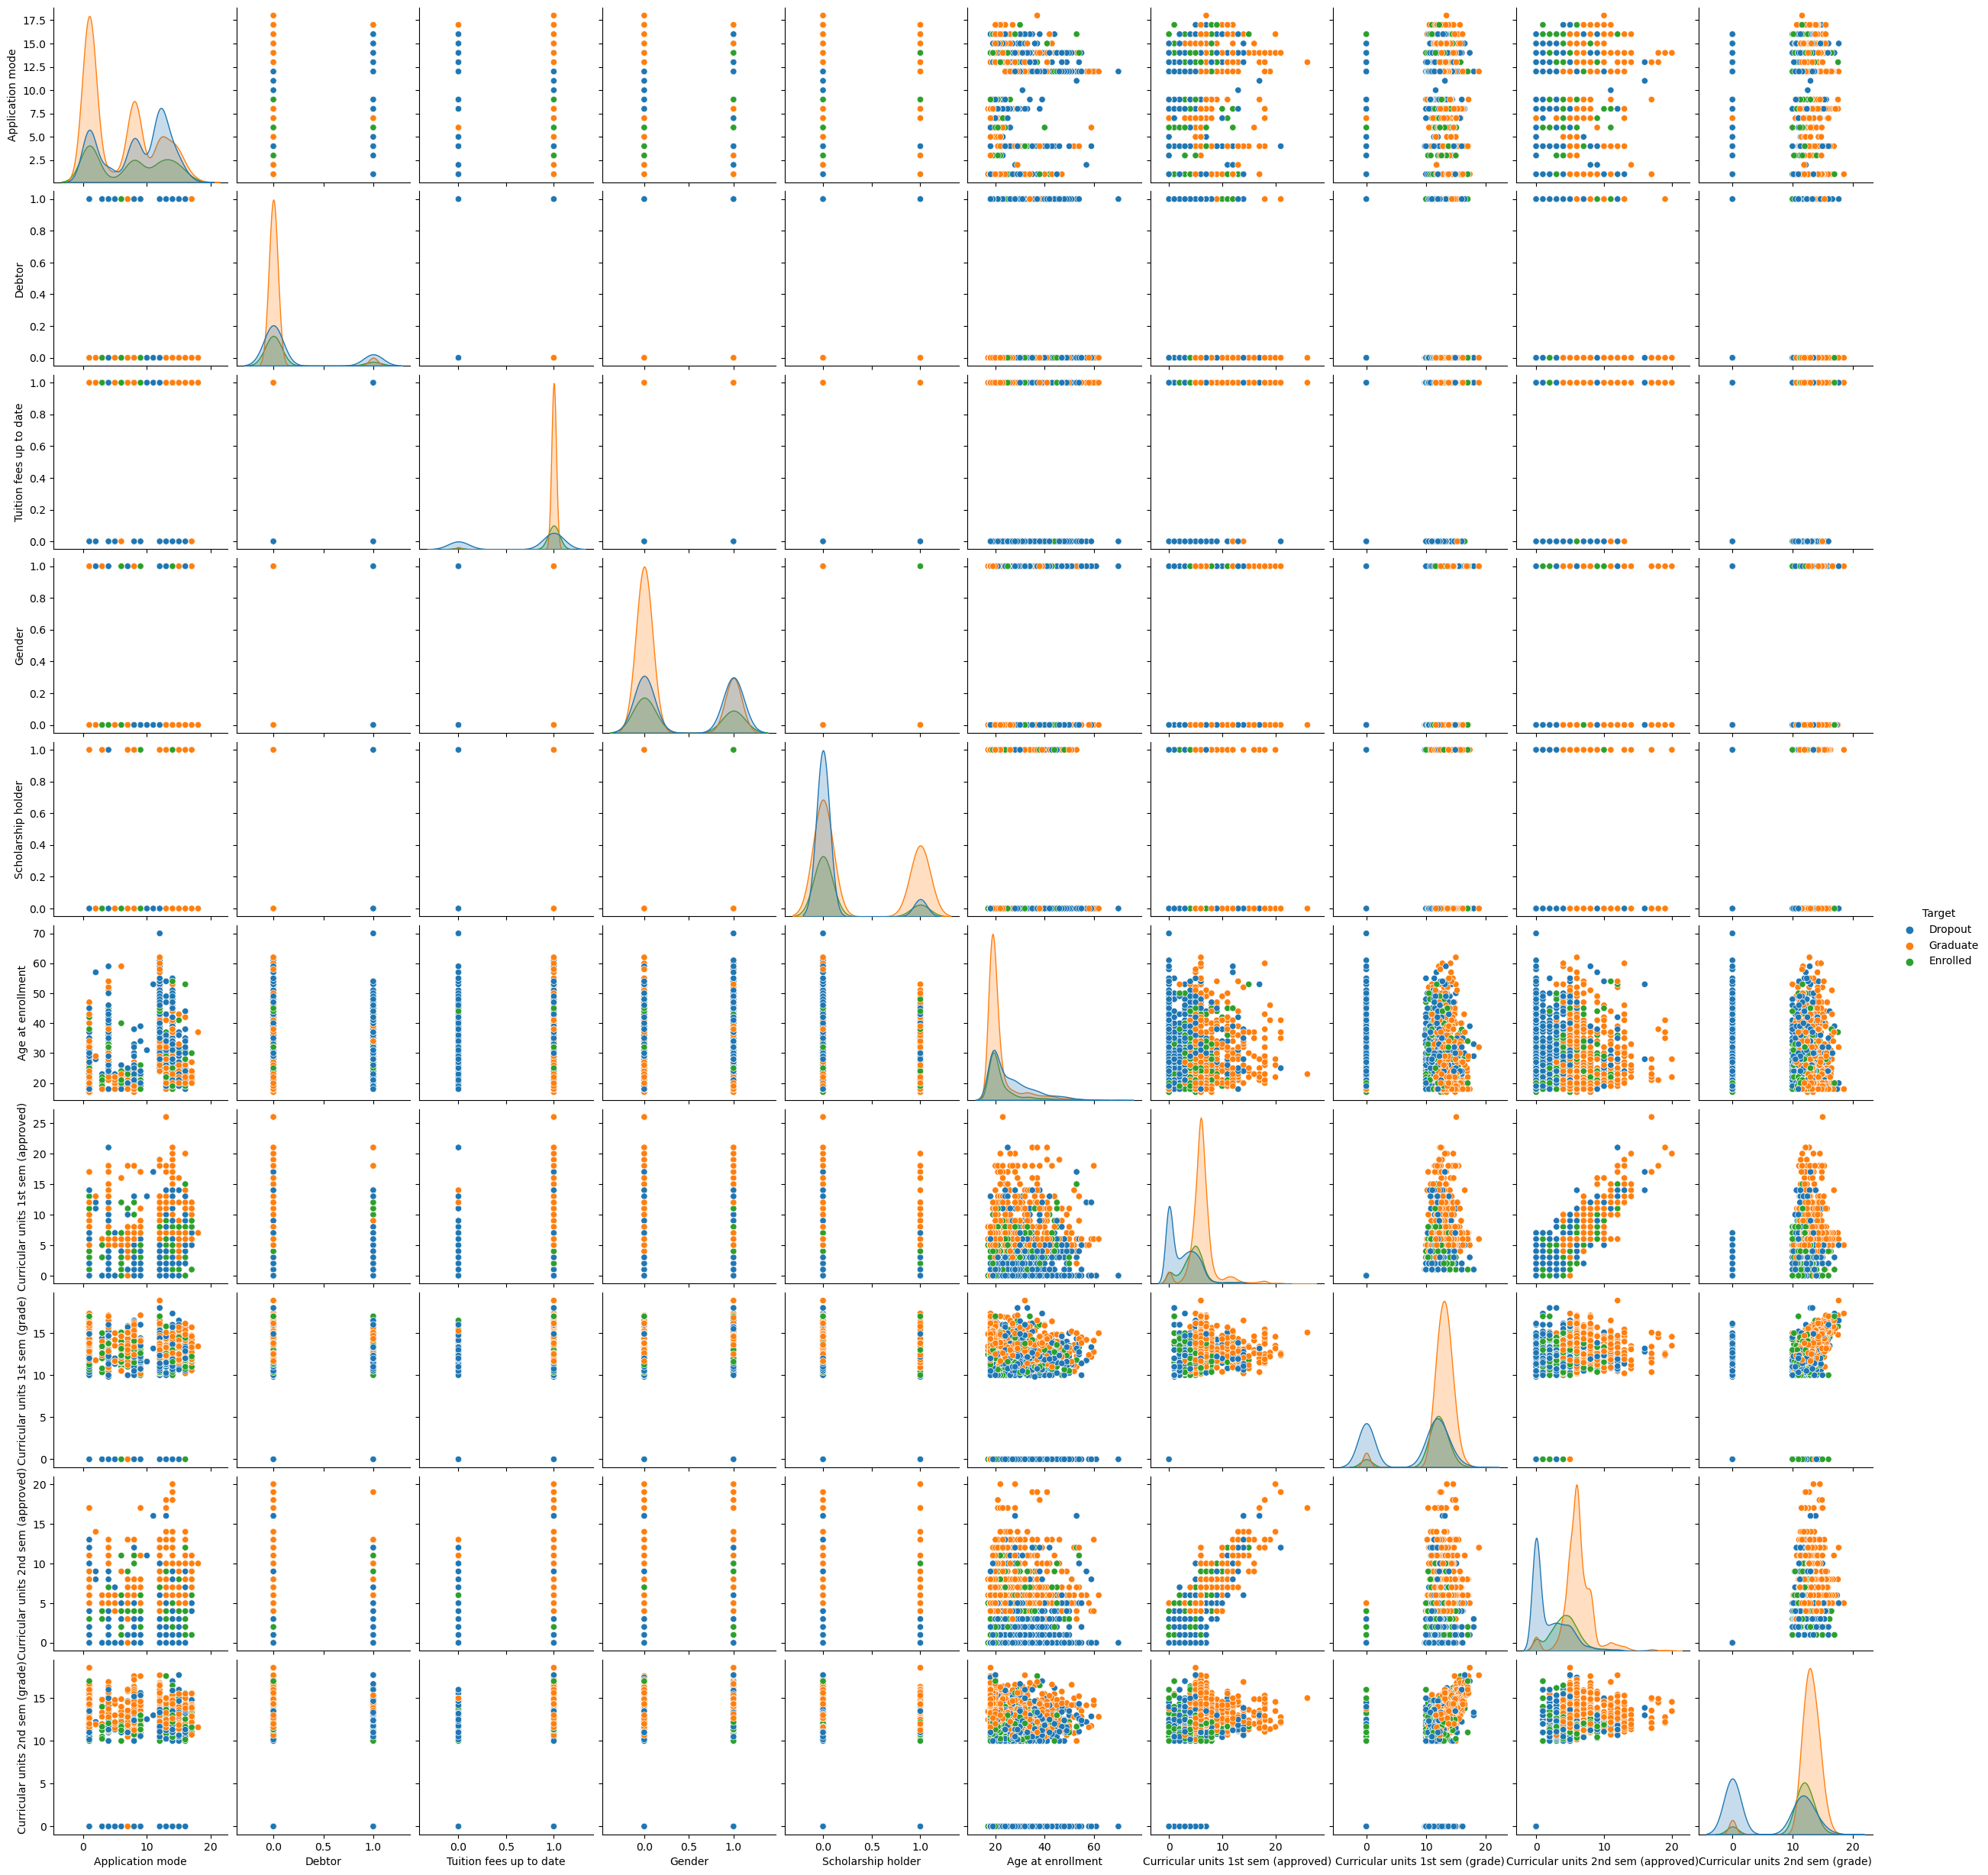

In [20]:
student_academic_df = student_academic[['Application mode', "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "Age at enrollment", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)", "Target"]]
pairplot = sns.pairplot(student_academic_df, hue = "Target")
pairplot.map_lower(sns.scatterplot)
plt.show()

<Axes: xlabel='Target'>

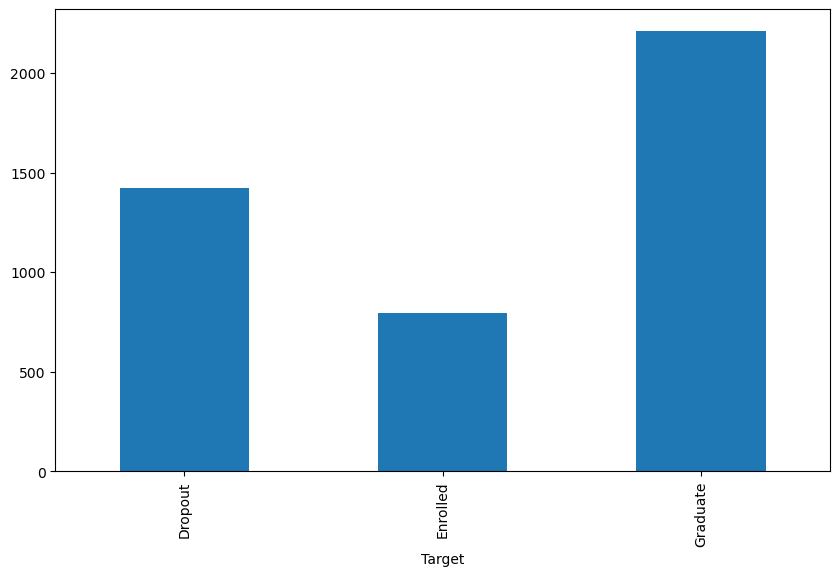

In [7]:
student_academic.groupby("Target")["Unemployment rate"].count().plot(kind = "bar", figsize = (10,6))

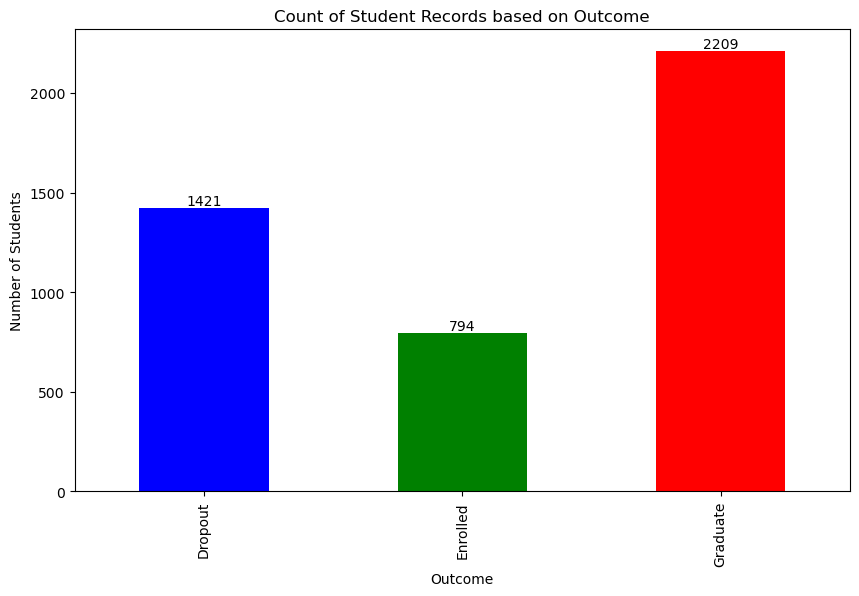

In [8]:
# Group by "Target" and count values in "Unemployment rate" column
count_data = student_academic.groupby("Target")["Unemployment rate"].count()

# Define custom colors for the bars
colors = ['blue', 'green', 'red', 'purple']  # You can add more colors as needed

# Create the bar plot with colors and annotations
ax = count_data.plot(kind="bar", figsize=(10, 6), color=colors)

# Annotate each bar with its value
for i, count in enumerate(count_data):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')

# Customize the plot labels and title
plt.xlabel("Outcome")
plt.ylabel("Number of Students")
plt.title("Count of Student Records based on Outcome")

# Show the plot
plt.show()

In [9]:
student_academic_1 = student_academic[student_academic["Target"] != "Enrolled"]
student_academic_2 = student_academic[student_academic["Target"] == "Enrolled"]


In [10]:
student_academic_1.reset_index(drop=True, inplace=True)
student_academic_2.reset_index(drop=True, inplace=True)

In [11]:
student_academic_2

Marital status  Application mode  Application order  Course  \
0                 1                 9                  1      10   
1                 1                 1                  1      16   
2                 1                 9                  4      13   
3                 1                 1                  1      10   
4                 1                 1                  1       6   
..              ...               ...                ...     ...   
789               1                 3                  4      16   
790               1                 9                  2      16   
791               1                 1                  1       5   
792               1                14                  1       5   
793               1                14                  1       1   

     Daytime/evening attendance  Previous qualification  Nacionality  \
0                             1                       1            1   
1                             1                       1            1   
2                             1                       1            1   
3                             1                       1            1   
4                             1                       1            1   
..                          ...                     ...          ...   
789                           1                       1            1   
790                           1                       1            1   
791                           1                       1            1   
792                           1                       1            1   
793                           1                       1            1   

     Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                        13                      28                    6  ...   
1                        13                      14                    8  ...   
2                         1                      28                    5  ...   
3                        13                      28                   10  ...   
4                        13                      14                    4  ...   
..                      ...                     ...                  ...  ...   
789                       3                      28                    4  ...   
790                       1                      14                    4  ...   
791                       1                      28                    6  ...   
792                      13                      14                    8  ...   
793                      22                       1                   10  ...   

     Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                      0                                    6   
1                                      0                                    7   
2                                      0                                    8   
3                                      0                                    6   
4                                      0                                    5   
..                                   ...                                  ...   
789                                    0                                    6   
790                                    0                                    6   
791                                    0                                    6   
792                                    2                                    6   
793                                    2                                    8   

     Curricular units 2nd sem (evaluations)  \
0                                        14   
1                                         8   
2                                         9   
3                                        12   
4                                         7   
..                                      ...   
789                                       9   
7

### Data Profile

In [ ]:
student_profile = ProfileReport(student_academic)
student_profile

No duplicate or null values.

## EDA

#### Converting categorical to numerical variables

In [24]:
label_encoder = LabelEncoder()
student_academic_1["Target"] = label_encoder.fit_transform(student_academic_1["Target"])

C:\Users\rgs88\AppData\Local\Temp\ipykernel_25136\2474077902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_academic_1["Target"] = label_encoder.fit_transform(student_academic_1["Target"])


In [25]:
student_academic_1.Target.value_counts()

1    2209
0    1421
Name: Target, dtype: int64

#### Finding Outliers

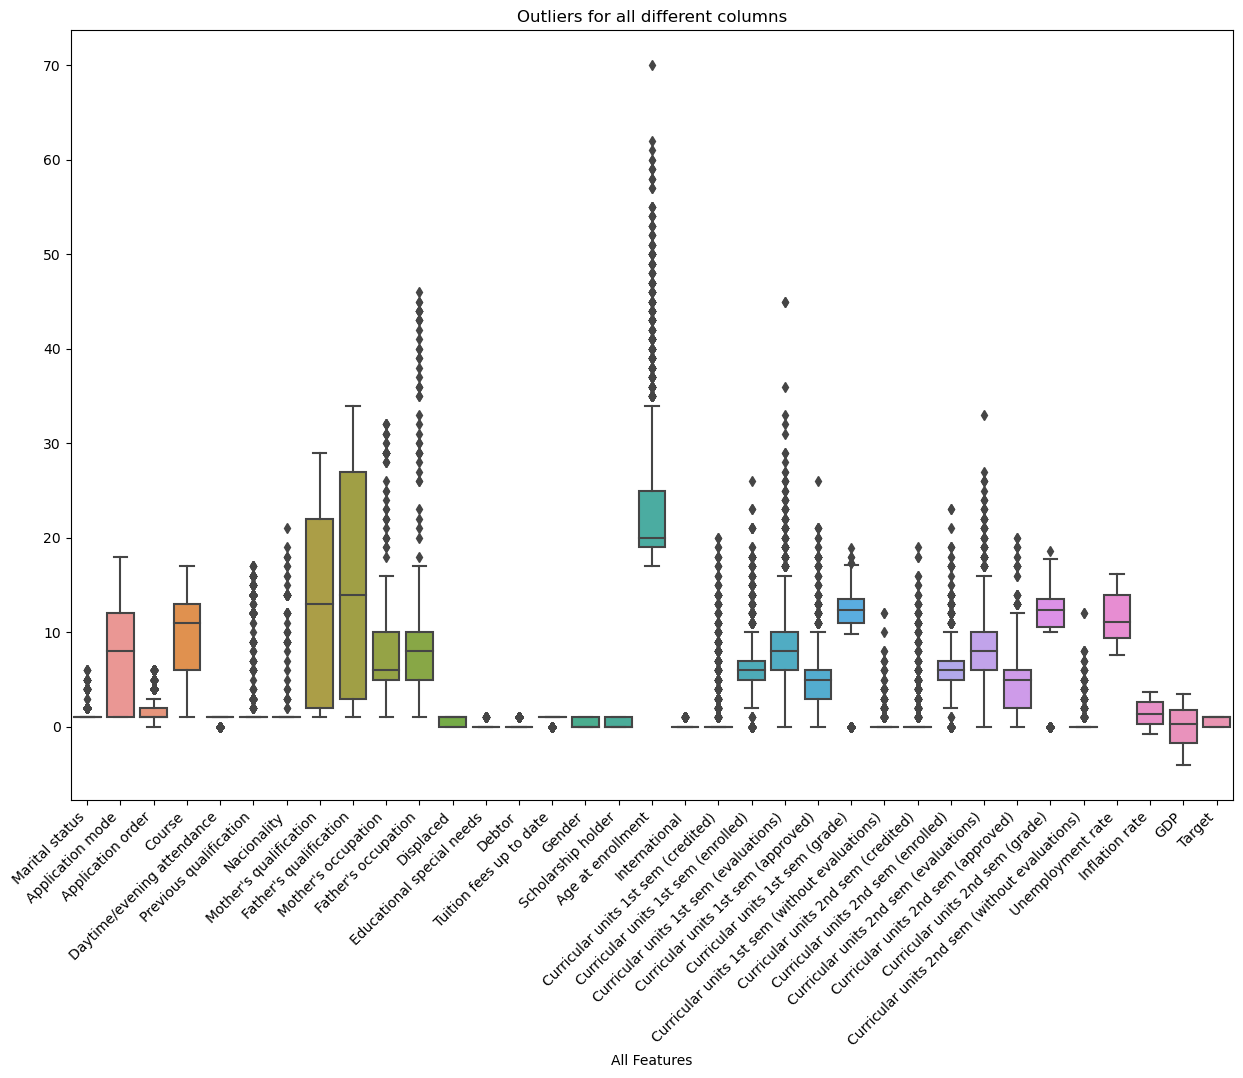

In [26]:
plt.figure(figsize = (15,10))
columns = student_academic_1.columns
sns.boxplot(data = student_academic_1)
plt.xticks(range(len(columns)), columns, rotation = 45, ha = "right")
plt.xlabel("All Features")
plt.title("Outliers for all different columns")
plt.show()

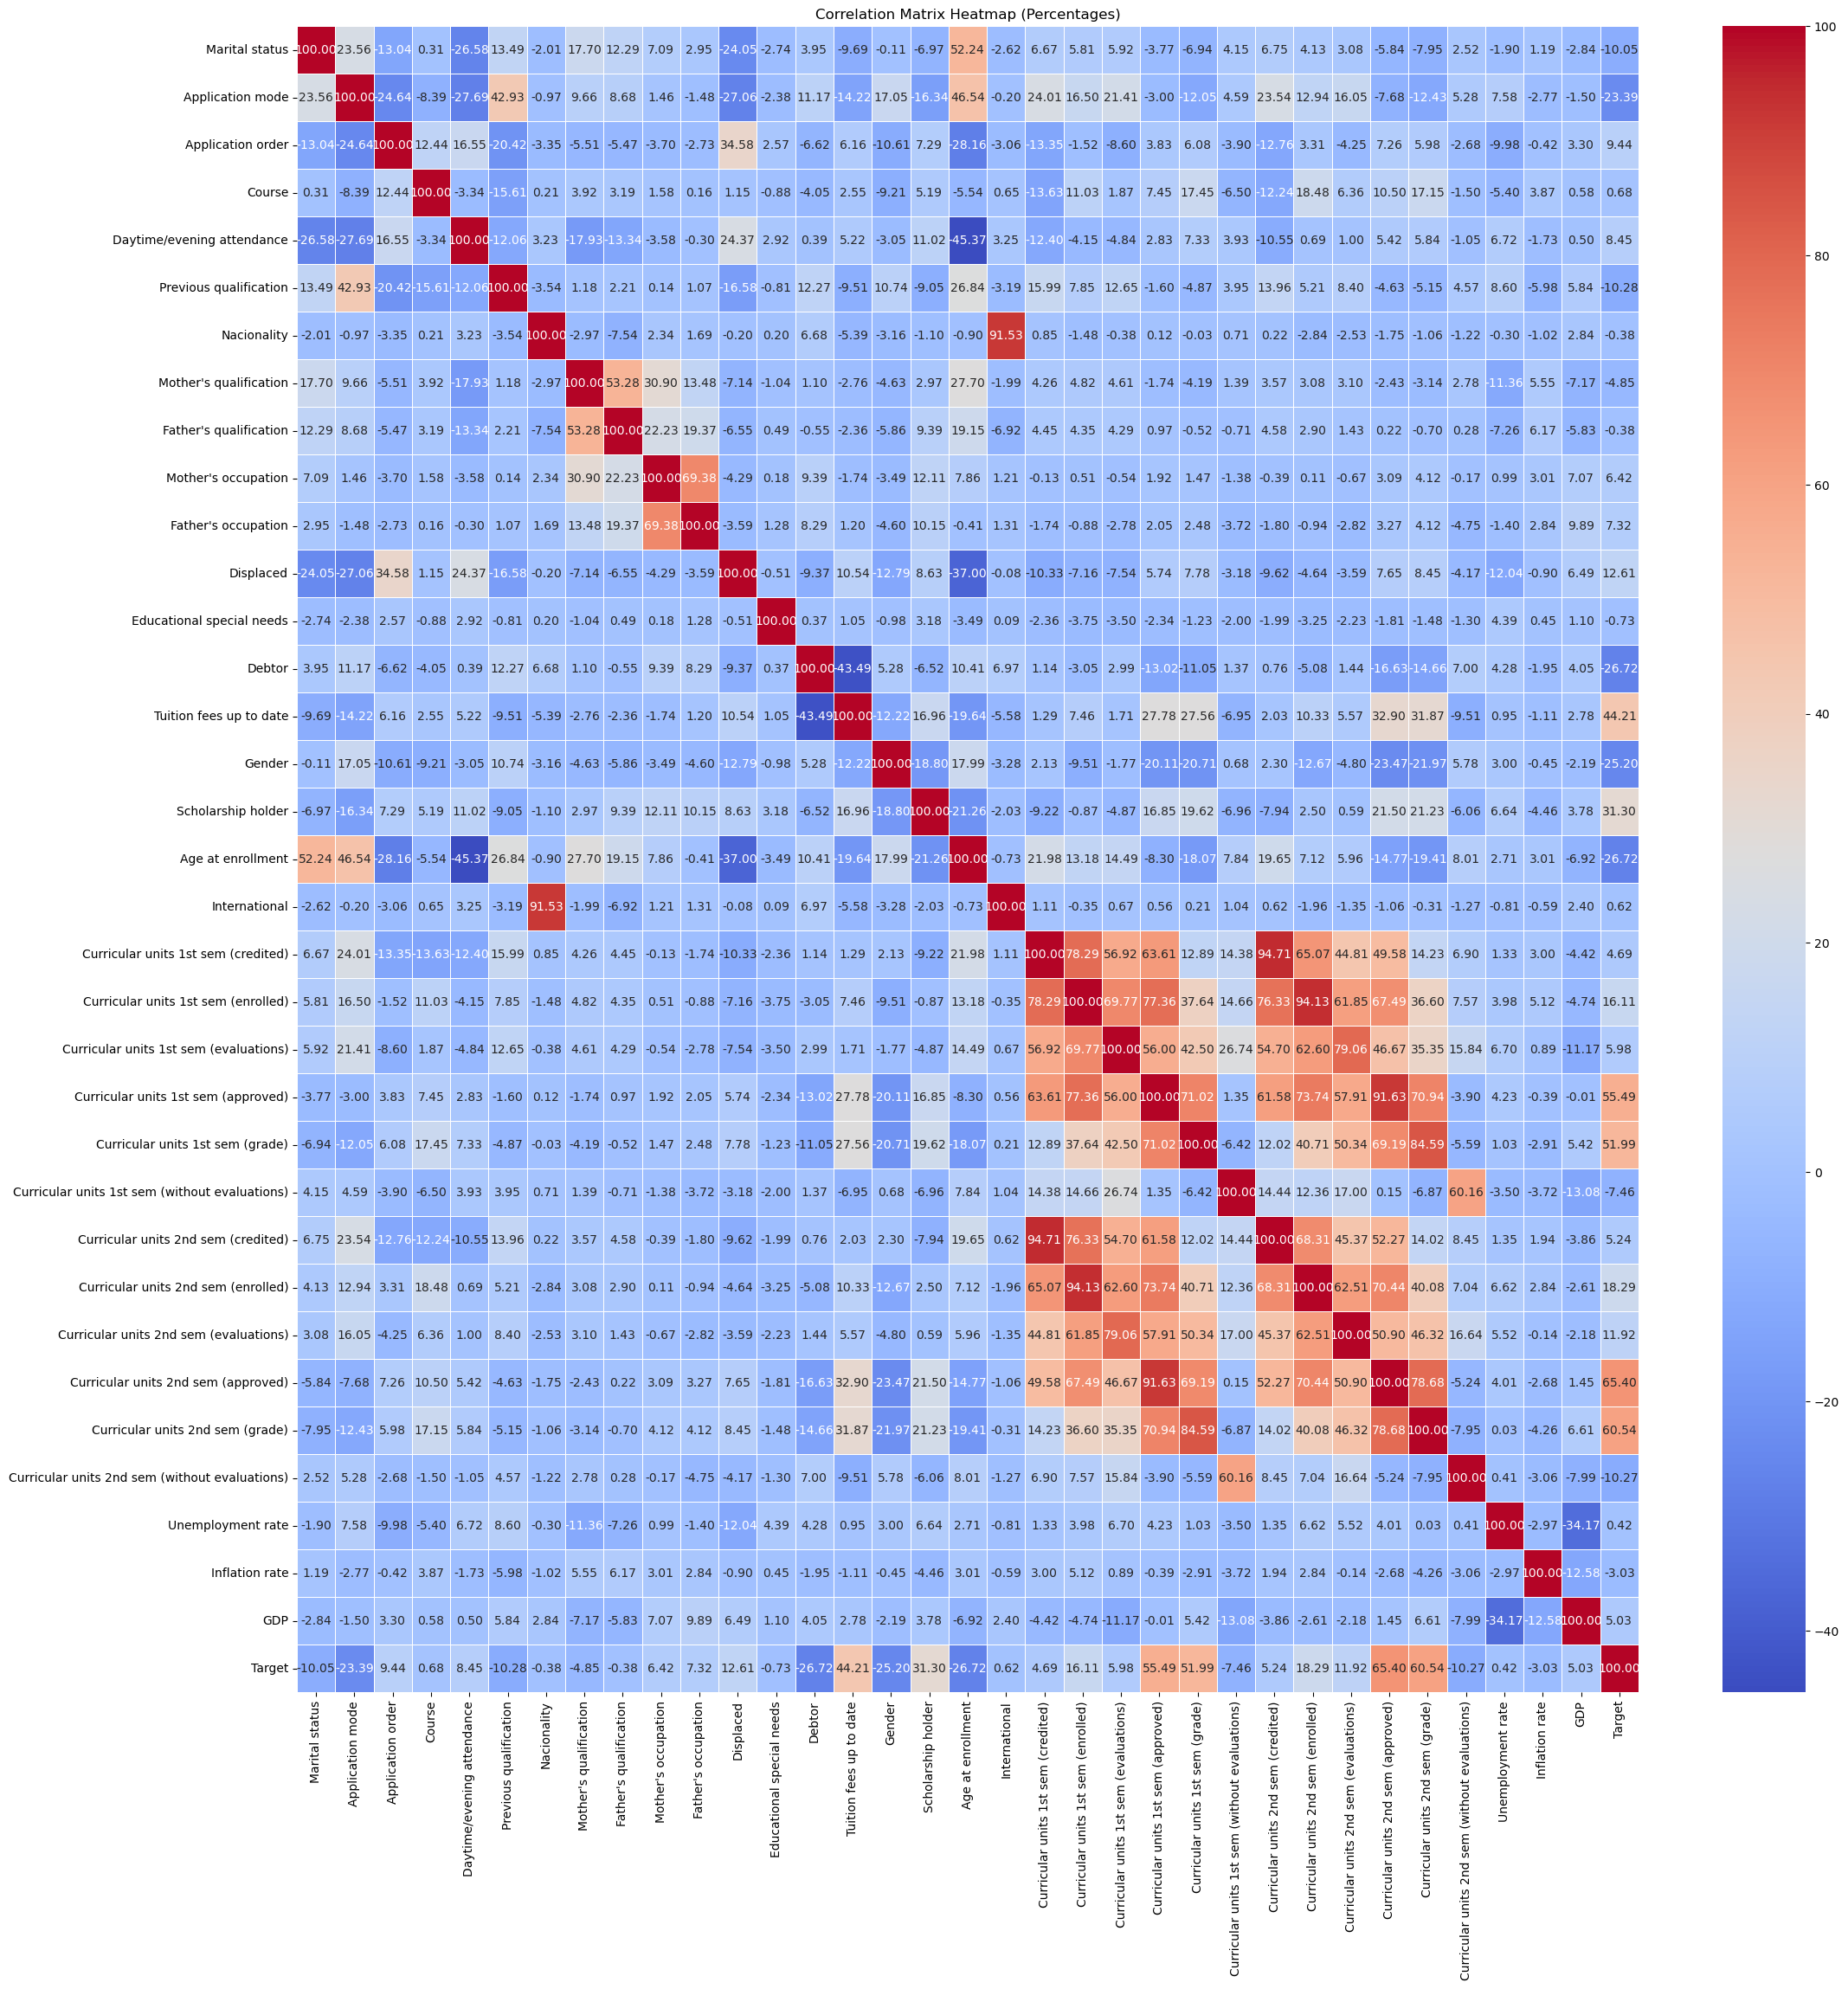

In [27]:
correlation_matrix = student_academic_1.corr()

# Multiply the correlation matrix by 100 to convert to percentages
correlation_matrix_percentage = correlation_matrix * 100

plt.figure(figsize=(25, 25))  # Set the figure size for better visualization

# Use the correlation_matrix_percentage and format as percentages with two decimal places
sns.heatmap(correlation_matrix_percentage, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap (Percentages)')
plt.show()

In [28]:
abs(correlation_matrix_percentage["Target"])

Marital status                                     10.047907
Application mode                                   23.388814
Application order                                   9.435463
Course                                              0.681430
Daytime/evening attendance                          8.449594
Previous qualification                             10.279451
Nacionality                                         0.382283
Mother's qualification                              4.845856
Father's qualification                              0.384991
Mother's occupation                                 6.419503
Father's occupation                                 7.323826
Displaced                                          12.611304
Educational special needs                           0.725365
Debtor                                             26.720720
Tuition fees up to date                            44.213758
Gender                                             25.195481
Scholarship holder      

In [29]:
student_academic_1.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

We can use K-Fold Cross Validation to experiment with different percentage thresholds for feature selection. We set the correlation threshold to be for variables that are above 20% to removed.

In [132]:
student_academic_model = student_academic_1[['Application mode', "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "Age at enrollment", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)", "Target"]]
student_academic_prediction = student_academic_2[['Application mode', "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "Age at enrollment", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)"]]
student_academic_prediction_1 = student_academic_prediction.copy()

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=6)
x_updated = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support()]
print(selected_features)

NameError: name 'x' is not defined

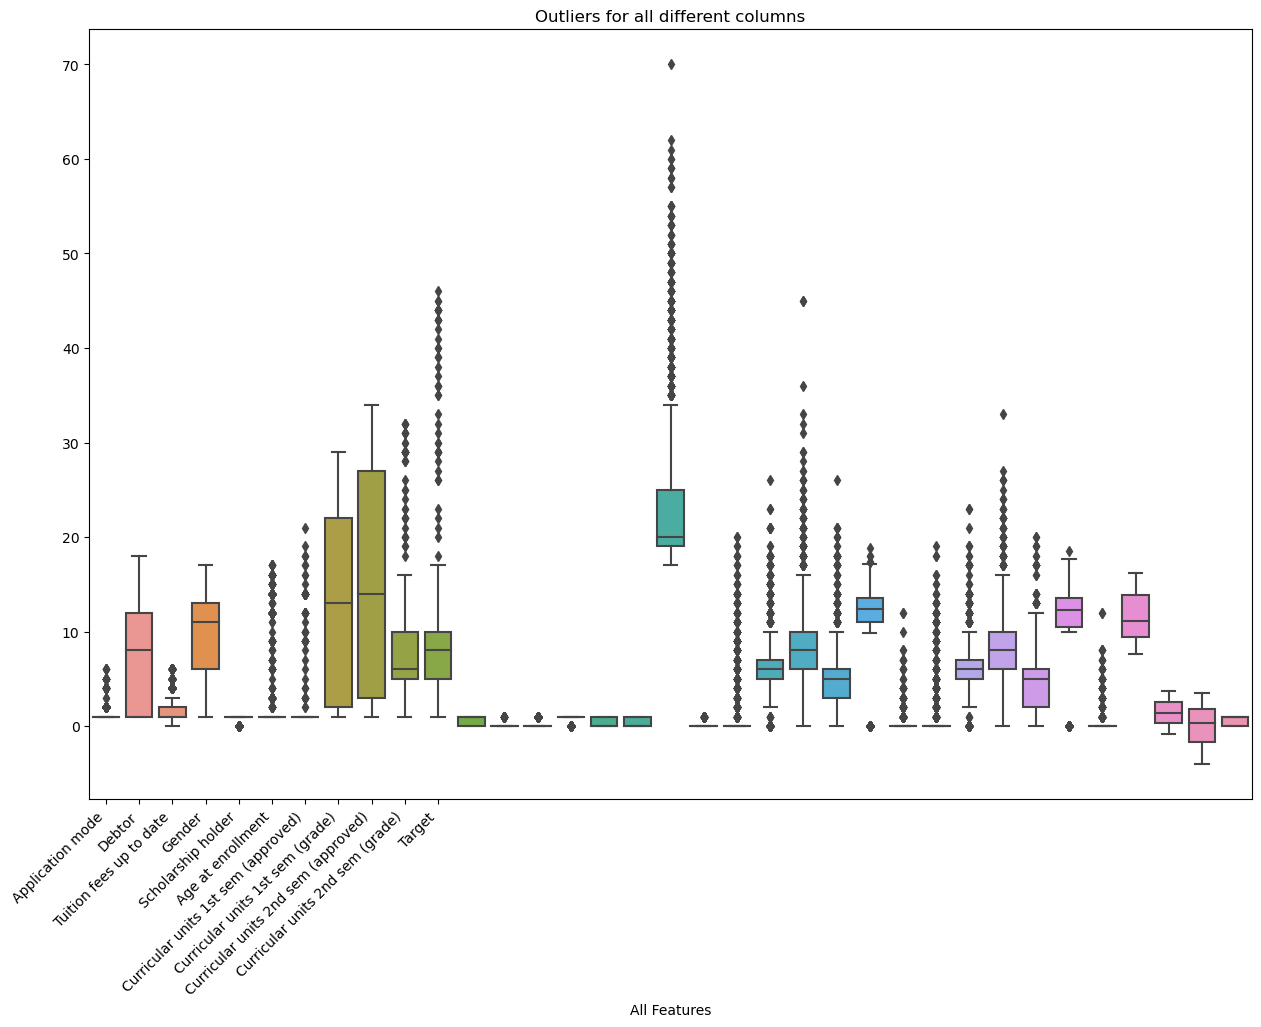

In [32]:
plt.figure(figsize = (15,10))
columns = student_academic_model.columns
sns.boxplot(data = student_academic_1)
plt.xticks(range(len(columns)), columns, rotation = 45, ha = "right")
plt.xlabel("All Features")
plt.title("Outliers for all different columns")
plt.show()

In [33]:
student_academic_model

Application mode  Debtor  Tuition fees up to date  Gender  \
0                    8       0                        1       1   
1                    6       0                        0       1   
2                    1       0                        0       1   
3                    8       0                        1       0   
4                   12       0                        1       0   
...                ...     ...                      ...     ...   
3625                 1       0                        1       1   
3626                 1       1                        0       0   
3627                 1       0                        1       0   
3628                 1       0                        1       0   
3629                 5       0                        1       0   

      Scholarship holder  Age at enrollment  \
0                      0                 20   
1                      0                 19   
2                      0                 19   
3                      0                 20   
4                      0                 45   
...                  ...                ...   
3625                   0                 19   
3626                   0                 18   
3627                   1                 30   
3628                   1                 20   
3629                   0                 22   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                       0                          0.000000   
1                                       6                         14.000000   
2                                       0                          0.000000   
3                                       6                         13.428571   
4                                       5                         12.333333   
...                                   ...                               ...   
3625                                    5                         13.600000   
3626                                    6                         12.000000   
3627                                    7                         14.912500   
3628                                    5                         13.800000   
3629                                    6                         11.666667   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                       0                          0.000000   
1                                       6                         13.666667   
2                                       0                          0.000000   
3                                       5                         12.400000   
4                                       6                         13.000000   
...                                   ...                               ...   
3625                                    5                         12.666667   
3626                                    2                         11.000000   
3627                                    1                         13.500000   
3628                                    5                         12.000000   
3629                                    6                         13.000000   

      Target  
0          0  
1          1  
2          0  
3          1  
4          1  
...      ...  
3625       1  
3626       0  
3627       0  
3628       1  
3629       1  

[3630 rows x 11 columns]

In [74]:
outliers_features = student_academic_model[["Age at enrollment", 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']]

# Create an empty list to store outliers' indices
outliers_indices = []

# Calculate and remove outliers for each selected feature
for feature in outliers_features:
    # Calculate the interquartile range (IQR)
    Q1 = student_academic_model[feature].quantile(0.25)
    Q3 = student_academic_model[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers for the current feature and store their indices
    outliers = student_academic_model[(student_academic_model[feature] < lower_bound) | (student_academic_model[feature] > upper_bound)]
    outliers_indices.extend(outliers.index)

# Remove duplicates from the outliers indices list
outliers_indices = list(set(outliers_indices))

# Remove rows with outliers from the DataFrame
student_academic_model = student_academic_model.drop(index=outliers_indices)

In [75]:
student_academic_model

Application mode  Debtor  Tuition fees up to date  Gender  \
1                    6       0                        0       1   
3                    8       0                        1       0   
8                    1       0                        1       0   
10                   1       0                        1       0   
11                   1       0                        1       0   
...                ...     ...                      ...     ...   
3623                 1       0                        1       0   
3624                15       0                        1       1   
3625                 1       0                        1       1   
3628                 1       0                        1       0   
3629                 5       0                        1       0   

      Scholarship holder  Age at enrollment  \
1                      0                 19   
3                      0                 20   
8                      1                 21   
10                     0                 18   
11                     1                 18   
...                  ...                ...   
3623                   1                 20   
3624                   0                 20   
3625                   0                 19   
3628                   1                 20   
3629                   0                 22   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
1                                       6                         14.000000   
3                                       6                         13.428571   
8                                       6                         13.875000   
10                                      6                         12.333333   
11                                      7                         13.214286   
...                                   ...                               ...   
3623                                    6                         13.833333   
3624                                    6                         12.500000   
3625                                    5                         13.600000   
3628                                    5                         13.800000   
3629                                    6                         11.666667   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
1                                       6                         13.666667   
3                                       5                         12.400000   
8                                       6                         14.142857   
10                                      5                         14.200000   
11                                      7                         13.214286   
...                                   ...                               ...   
3623                                    6                         13.500000   
3624                                    7                         13.142857   
3625                                    5                         12.666667   
3628                                    5                         12.000000   
3629                                    6                         13.000000   

      Target  
1          1  
3          1  
8          1  
10         1  
11         1  
...      ...  
3623       1  
3624       1  
3625       1  
3628       1  
3629       1  

[1502 rows x 11 columns]

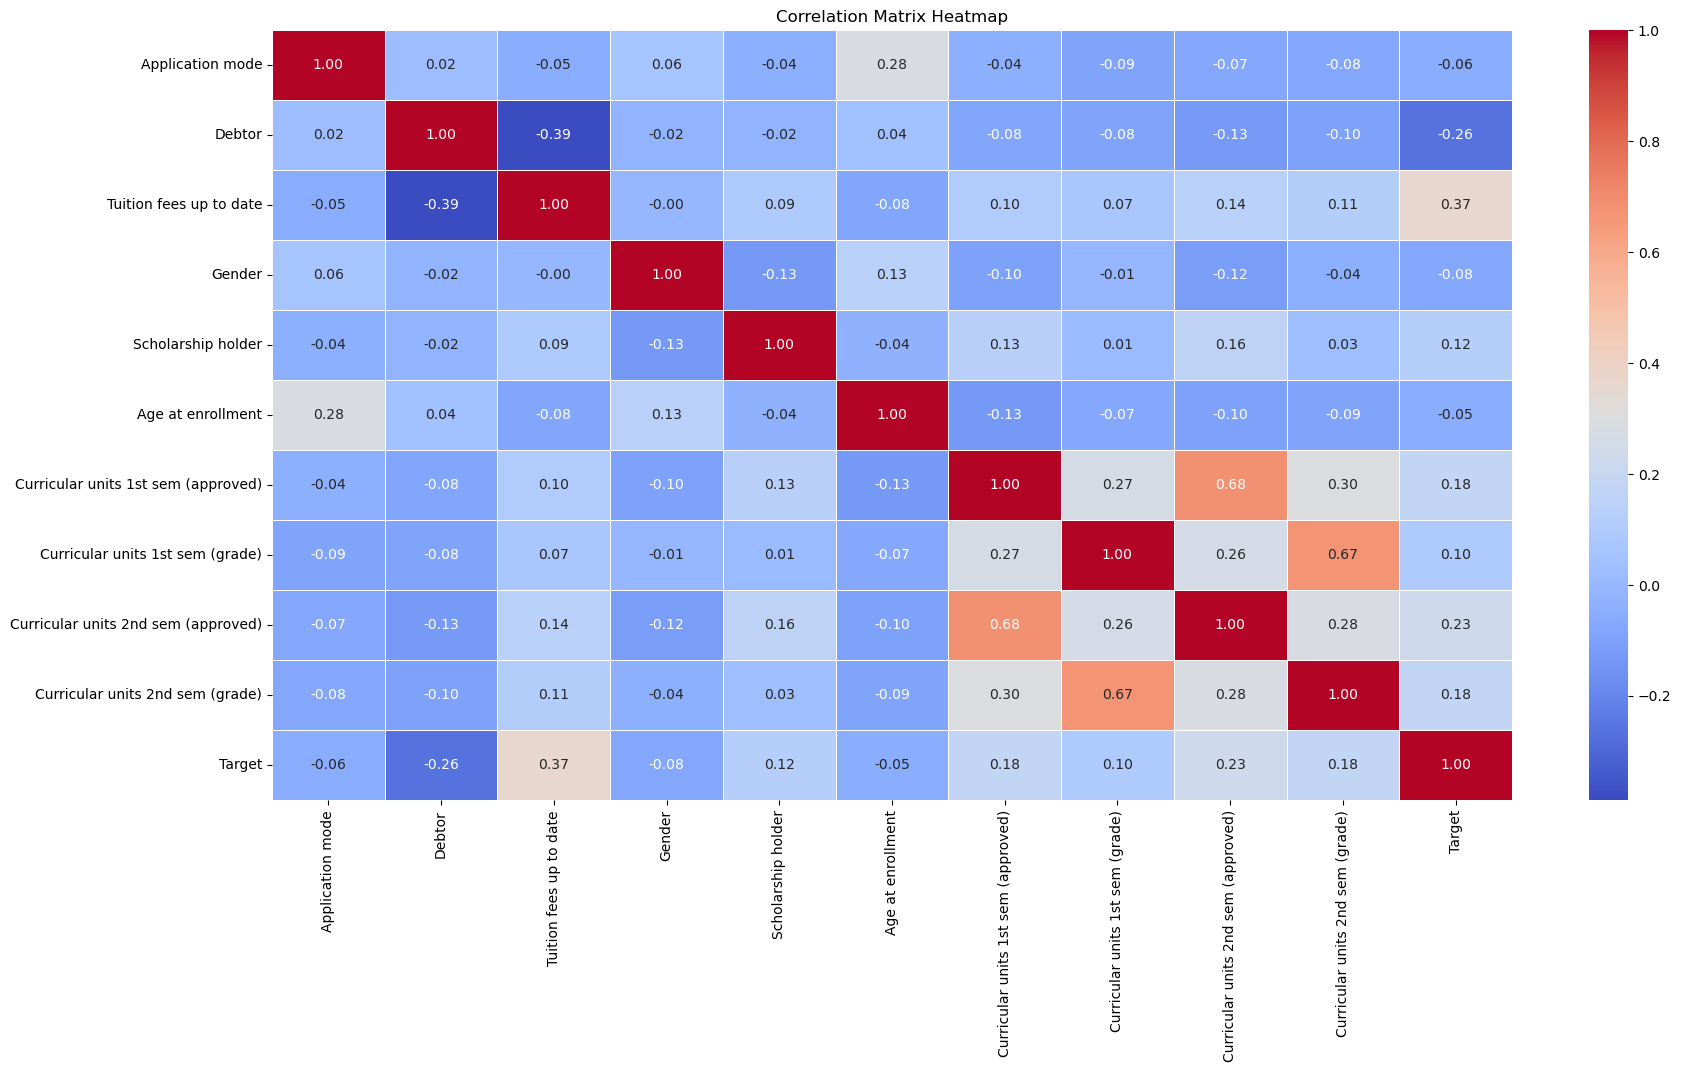

In [76]:
correlation_matrix1 = student_academic_model.corr()
plt.figure(figsize=(20, 10))  # Set the figure size for better visualization
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [77]:
student_academic_model

Application mode  Debtor  Tuition fees up to date  Gender  \
1                    6       0                        0       1   
3                    8       0                        1       0   
8                    1       0                        1       0   
10                   1       0                        1       0   
11                   1       0                        1       0   
...                ...     ...                      ...     ...   
3623                 1       0                        1       0   
3624                15       0                        1       1   
3625                 1       0                        1       1   
3628                 1       0                        1       0   
3629                 5       0                        1       0   

      Scholarship holder  Age at enrollment  \
1                      0                 19   
3                      0                 20   
8                      1                 21   
10                     0                 18   
11                     1                 18   
...                  ...                ...   
3623                   1                 20   
3624                   0                 20   
3625                   0                 19   
3628                   1                 20   
3629                   0                 22   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
1                                       6                         14.000000   
3                                       6                         13.428571   
8                                       6                         13.875000   
10                                      6                         12.333333   
11                                      7                         13.214286   
...                                   ...                               ...   
3623                                    6                         13.833333   
3624                                    6                         12.500000   
3625                                    5                         13.600000   
3628                                    5                         13.800000   
3629                                    6                         11.666667   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
1                                       6                         13.666667   
3                                       5                         12.400000   
8                                       6                         14.142857   
10                                      5                         14.200000   
11                                      7                         13.214286   
...                                   ...                               ...   
3623                                    6                         13.500000   
3624                                    7                         13.142857   
3625                                    5                         12.666667   
3628                                    5                         12.000000   
3629                                    6                         13.000000   

      Target  
1          1  
3          1  
8          1  
10         1  
11         1  
...      ...  
3623       1  
3624       1  
3625       1  
3628       1  
3629       1  

[1502 rows x 11 columns]

In [78]:
def data_statistics(df):
    statistics = []
    
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    for column in numeric_columns:
        summary_stats = df[column].describe()
        skewness = df[column].skew()
        kurt = df[column].kurtosis()
        
        statistics.append({
            "Column": column,
            "Mean": summary_stats['mean'],
            "Std": summary_stats['std'],
            "Min": summary_stats['min'],
            "25%": summary_stats['25%'],
            "50%": summary_stats['50%'],
            "75%": summary_stats['75%'],
            "Max": summary_stats['max'],
            "Skewness": skewness,
            "Kurtosis": kurt
        })
    
    return pd.DataFrame(statistics)

In [79]:
data_statistics(student_academic_model)

Column       Mean       Std        Min  \
0                      Application mode   4.595206  4.599328   1.000000   
1                                Debtor   0.063915  0.244683   0.000000   
2               Tuition fees up to date   0.964048  0.186233   0.000000   
3                                Gender   0.233023  0.422897   0.000000   
4                    Scholarship holder   0.400133  0.490088   0.000000   
5                     Age at enrollment  19.195739  1.250304  17.000000   
6   Curricular units 1st sem (approved)   5.717710  0.801526   4.000000   
7      Curricular units 1st sem (grade)  13.016876  1.184276  10.166667   
8   Curricular units 2nd sem (approved)   5.682423  0.852756   4.000000   
9      Curricular units 2nd sem (grade)  12.945343  1.179861  10.000000   
10                               Target   0.889481  0.313640   0.000000   

          25%        50%        75%        Max  Skewness   Kurtosis  
0    1.000000   1.000000   8.000000  17.000000  0.914577  -0.313094  
1    0.000000   0.000000   0.000000   1.000000  3.569251  10.753869  
2    1.000000   1.000000   1.000000   1.000000 -4.990174  22.932368  
3    0.000000   0.000000   0.000000   1.000000  1.264294  -0.402097  
4    0.000000   0.000000   1.000000   1.000000  0.408090  -1.835909  
5   18.000000  19.000000  20.000000  23.000000  1.041294   0.571322  
6    5.000000   6.000000   6.000000   7.000000 -0.504693  -0.079929  
7   12.166667  13.000000  13.833333  16.333333  0.218198  -0.424340  
8    5.000000   6.000000   6.000000   7.000000 -0.356054  -0.437273  
9   12.142857  12.858571  13.771429  16.142857  0.180291  -0.390595  
10   1.000000   1.000000   1.000000   1.000000 -2.486925   4.190373

The variables Debtor, Tuition fees up to date, Age at enrollment. There are lots of features which are higher than abs(0.5) for skewness, except application mode and target. We standardise all these variables, although application mode does not need to be standardised.

In [80]:
from scipy.stats import norm  # Import norm for the normal distribution


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, kde=True)  # Add KDE (Kernel Density Estimation) plot
    plt.title('Histogram')

    # Plot a normal distribution curve
    mu, sigma = df[variable].mean(), df[variable].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)  # Use norm from scipy.stats
    plt.plot(x, p, 'k', linewidth=2)

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

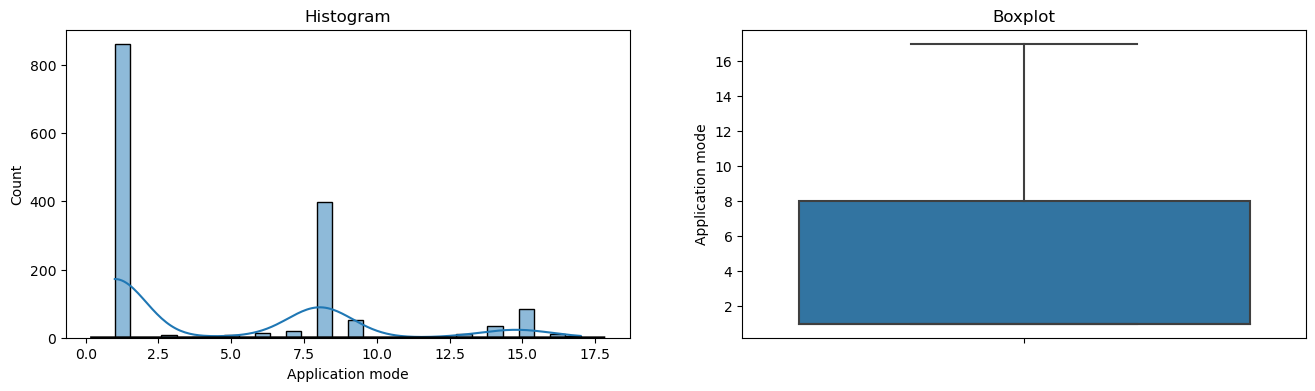

In [81]:
diagnostic_plots(student_academic_model, "Application mode")

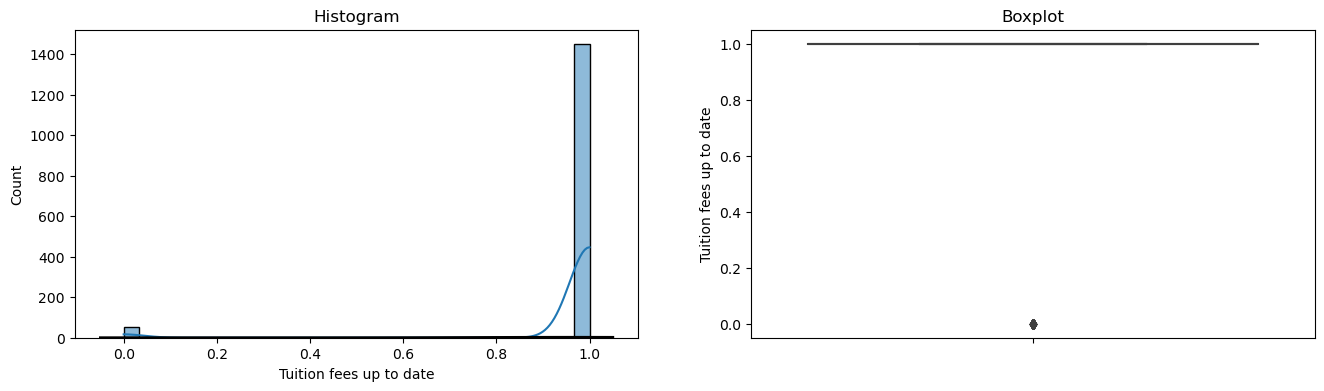

In [82]:
diagnostic_plots(student_academic_model, "Tuition fees up to date")

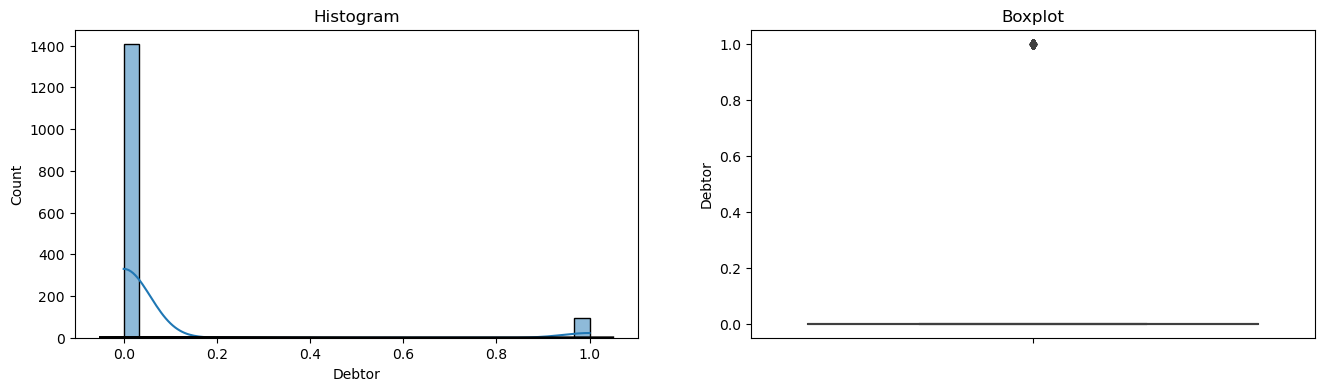

In [83]:
diagnostic_plots(student_academic_model, "Debtor")

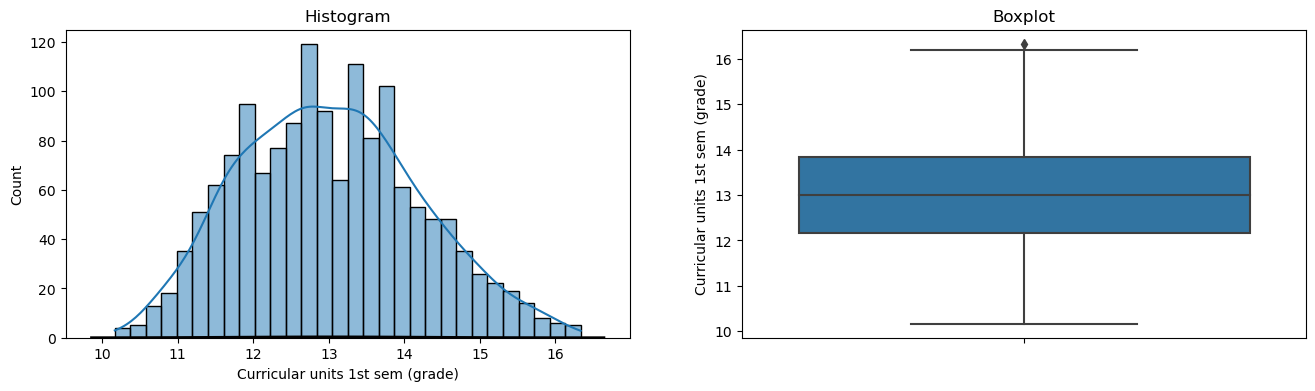

In [84]:
diagnostic_plots(student_academic_model, "Curricular units 1st sem (grade)")

In [63]:
X = student_academic_model.drop(columns = "Target")
y = student_academic_model["Target"]

In [64]:
X

Application mode  Debtor  Tuition fees up to date  Gender  \
1                    6       0                        0       1   
3                    8       0                        1       0   
8                    1       0                        1       0   
10                   1       0                        1       0   
11                   1       0                        1       0   
...                ...     ...                      ...     ...   
3623                 1       0                        1       0   
3624                15       0                        1       1   
3625                 1       0                        1       1   
3628                 1       0                        1       0   
3629                 5       0                        1       0   

      Scholarship holder  Age at enrollment  \
1                      0                 19   
3                      0                 20   
8                      1                 21   
10                     0                 18   
11                     1                 18   
...                  ...                ...   
3623                   1                 20   
3624                   0                 20   
3625                   0                 19   
3628                   1                 20   
3629                   0                 22   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
1                                       6                         14.000000   
3                                       6                         13.428571   
8                                       6                         13.875000   
10                                      6                         12.333333   
11                                      7                         13.214286   
...                                   ...                               ...   
3623                                    6                         13.833333   
3624                                    6                         12.500000   
3625                                    5                         13.600000   
3628                                    5                         13.800000   
3629                                    6                         11.666667   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  
1                                       6                         13.666667  
3                                       5                         12.400000  
8                                       6                         14.142857  
10                                      5                         14.200000  
11                                      7                         13.214286  
...                                   ...                               ...  
3623                                    6                         13.500000  
3624                                    7                         13.142857  
3625                                    5                         12.666667  
3628                                    5                         12.000000  
3629                                    6                         13.000000  

[1572 rows x 10 columns]

### Standardisation of data

In [65]:
minmax_scaler = MinMaxScaler()
X = minmax_scaler.fit_transform(X)

In [66]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
student_academic_model

Application mode  Debtor  Tuition fees up to date  Gender  \
1                    6       0                        0       1   
3                    8       0                        1       0   
8                    1       0                        1       0   
10                   1       0                        1       0   
11                   1       0                        1       0   
...                ...     ...                      ...     ...   
3623                 1       0                        1       0   
3624                15       0                        1       1   
3625                 1       0                        1       1   
3628                 1       0                        1       0   
3629                 5       0                        1       0   

      Scholarship holder  Age at enrollment  \
1                      0                 19   
3                      0                 20   
8                      1                 21   
10                     0                 18   
11                     1                 18   
...                  ...                ...   
3623                   1                 20   
3624                   0                 20   
3625                   0                 19   
3628                   1                 20   
3629                   0                 22   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
1                                       6                         14.000000   
3                                       6                         13.428571   
8                                       6                         13.875000   
10                                      6                         12.333333   
11                                      7                         13.214286   
...                                   ...                               ...   
3623                                    6                         13.833333   
3624                                    6                         12.500000   
3625                                    5                         13.600000   
3628                                    5                         13.800000   
3629                                    6                         11.666667   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
1                                       6                         13.666667   
3                                       5                         12.400000   
8                                       6                         14.142857   
10                                      5                         14.200000   
11                                      7                         13.214286   
...                                   ...                               ...   
3623                                    6                         13.500000   
3624                                    7                         13.142857   
3625                                    5                         12.666667   
3628                                    5                         12.000000   
3629                                    6                         13.000000   

      Target  
1          1  
3          1  
8          1  
10         1  
11         1  
...      ...  
3623       1  
3624       1  
3625       1  
3628       1  
3629       1  

[1502 rows x 11 columns]

## K-Fold

# Models

### KNNeighbours Classification

In [67]:
# Define the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameter grid for optimization
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]  # You can add more values to explore a larger range of k
}

# Create a grid search object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)  # You can adjust the number of cross-validation folds (cv)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_k = grid_search.best_params_['n_neighbors']

# Train the KNN model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = knn.score(X_test, y_test)

print("Best k:", best_k)
print("Test set accuracy:", accuracy)

y_train_pred = knn.predict(X_train)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", training_accuracy)

Best k: 5
Test set accuracy: 0.8813559322033898
Training Accuracy: 0.9081818181818182


Accuracy on test set: 0.8813559322033898

Classification Report:

              precision    recall  f1-score     support
Class 0        0.478261  0.200000  0.282051   55.000000
Class 1        0.902004  0.971223  0.935335  417.000000
accuracy       0.881356  0.881356  0.881356    0.881356
macro avg      0.690133  0.585612  0.608693  472.000000
weighted avg   0.852628  0.881356  0.859211  472.000000

Precision: 0.9020044543429844
Recall: 0.9712230215827338
F1-Score: 0.9353348729792147


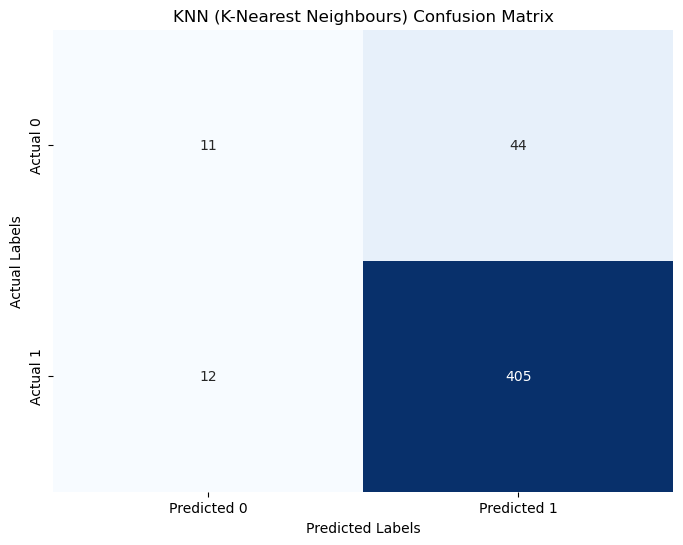

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# Convert the classification report to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Print the classification report in a structured tabular format
print("\nClassification Report:\n")
print(class_report_df)

# Extract precision, recall, and f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output precision, recall, and f1_score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('KNN (K-Nearest Neighbours) Confusion Matrix')
plt.show()

In [69]:
from sklearn.metrics import roc_curve

# Calculate predicted probabilities for the positive class
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate the true positive rate (TPR) and false positive rate (FPR) for different probability thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the KS statistic
ks_statistic = max(tpr - fpr)
print("KS Statistic:", ks_statistic)


KS Statistic: 0.32940919991279705


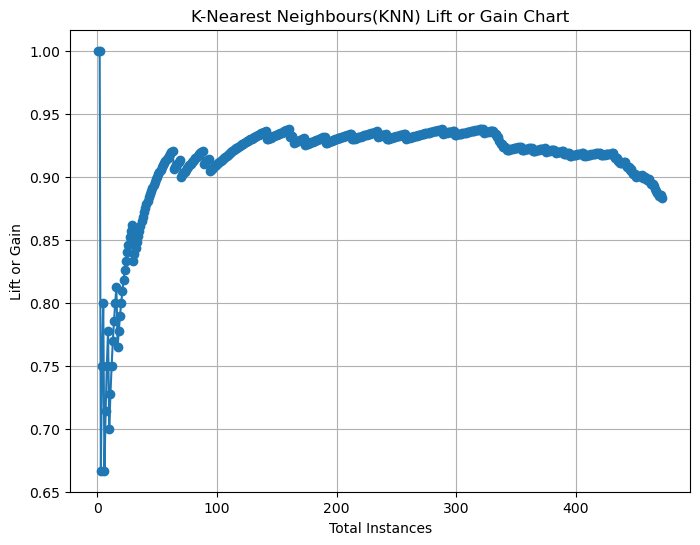

In [70]:
# Sort both 'y_prob' and 'y_test' based on 'y_prob'
sorted_indices = np.argsort(y_prob)[::-1]
sorted_probabilities = y_prob[sorted_indices]
sorted_labels = y_test.iloc[sorted_indices]  # Use .iloc to sort 'y_test'

# Calculate the cumulative number of positive instances and the total number of instances
cumulative_positives = np.cumsum(sorted_labels)
total_instances = np.arange(1, len(y_test) + 1)

# Calculate the lift or gain
lift = cumulative_positives / total_instances

# Plot the lift or gain chart
plt.figure(figsize=(8, 6))
plt.plot(total_instances, lift, marker='o', linestyle='-')
plt.xlabel("Total Instances")
plt.ylabel("Lift or Gain")
plt.title("K-Nearest Neighbours(KNN) Lift or Gain Chart")
plt.grid(True)
plt.show()

In [71]:
def select_features_by_correlation(data, threshold):
    # Compute the correlation matrix
    corr_matrix = data.corr()
    
    # Create a mask for features that meet the correlation threshold
    mask = np.abs(corr_matrix["Target"]) > threshold
    
    # Select features that meet the threshold
    selected_features = data.columns[mask]
    
    return selected_features

In [89]:
# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_threshold = None
best_mean_accuracy = 0.0

thresholds = [0.1, 0.15, 0.2, 0.25, 0.3]

# Define your select_features_by_correlation function based on your dataset

for threshold in thresholds:
    # Apply threshold to select features
    selected_features = select_features_by_correlation(student_academic_model, threshold)
    knn = KNeighborsClassifier(n_neighbors=7) 
    
    # Perform k-fold cross-validation
    scores = cross_val_score(knn, student_academic_model[selected_features], student_academic_model["Target"], cv=kf, scoring='accuracy', error_score='raise')
    
    # Calculate mean accuracy
    mean_accuracy = np.mean(scores)
    
    # Check if this threshold gives better accuracy
    if mean_accuracy > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best Mean Accuracy: {best_mean_accuracy:.2f}")

Best Threshold: 0.25
Best Mean Accuracy: 1.00


### Support Vector Machine (SVM)

In [90]:
# Define the SVM model
svm = SVC()

# Define the hyperparameter grid for optimization
param_grid1 = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type: linear or radial basis function (RBF)
    'gamma': [0.1, 1, 'scale'],   # Kernel coefficient for 'rbf' kernel
}

grid_search1 = GridSearchCV(estimator = svm, param_grid = param_grid1, scoring = "accuracy")
grid_search1.fit(X_train, y_train)

best_params = grid_search1.best_params_
print("Best Hyperparameters:", best_params)

# Train the SVM model with the best hyperparameters
svm = SVC(**best_params)
svm.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = svm.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

y_train_pred3 = best_decision_tree.predict(X_train)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred3)

print("Training Accuracy:", training_accuracy)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy on test set: 0.9004237288135594


NameError: name 'best_decision_tree' is not defined

In [ ]:
# Train the SVM model with the best hyperparameters
svm = SVC(**best_params)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# Convert the classification report to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Print the classification report in a structured tabular format
print("\nClassification Report:\n")
print(class_report_df)

# Extract precision, recall, and f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output precision, recall, and f1_score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

In [ ]:
y_prob1 = svm.decision_function(X_test)

# Create ROC curve
fpr, tpr, thresholds = roc_curve1(y_test, y_prob1)

# Calculate the KS statistic
ks = max(tpr - fpr)

print("KS Statistic:", ks)

# Sort both 'y_prob' and 'y_test' based on 'y_prob'
sorted_indices = np.argsort(y_prob1)[::-1]
sorted_probabilities = y_prob1[sorted_indices]
sorted_labels = y_test.iloc[sorted_indices]  # Use .iloc to sort 'y_test'

# Calculate the cumulative number of positive instances and the total number of instances
cumulative_positives = np.cumsum(sorted_labels)
total_instances = np.arange(1, len(y_test) + 1)

# Calculate the lift or gain
lift = cumulative_positives / total_instances

# Plot the lift or gain chart
plt.figure(figsize=(8, 6))
plt.plot(total_instances, lift, marker='o', linestyle='-')
plt.xlabel("Total Instances")
plt.ylabel("Lift or Gain")
plt.title("Support Vector Machine Lift or Gain Chart")
plt.grid(True)
plt.show()

In [91]:
# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_threshold = None
best_mean_accuracy = 0.0

thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

# Define your select_features_by_correlation function based on your dataset

for threshold in thresholds:
    # Apply threshold to select features
    selected_features = select_features_by_correlation(student_academic_model, threshold)
    
    # Perform k-fold cross-validation
    scores = cross_val_score(svm, student_academic_model[selected_features], student_academic_model["Target"], cv=kf, scoring='accuracy', error_score='raise')
    
    # Calculate mean accuracy
    mean_accuracy = np.mean(scores)
    
    # Check if this threshold gives better accuracy
    if mean_accuracy > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best Mean Accuracy: {best_mean_accuracy:.2f}")

Best Threshold: 0.05
Best Mean Accuracy: 1.00


### Decision Tree

In [92]:
# Create the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the classifier on the training data
decision_tree.fit(X_train, y_train)

# Define the hyperparameter grid for optimization
param_grid2 = {
    'criterion': ['gini', 'entropy'],        # Splitting criterion: gini impurity or information gain (entropy)
    'max_depth': [None, 5, 10, 20],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]            # Minimum number of samples required to be at a leaf node
}

# Perform GridSearchCV to find the best hyperparameters
grid_search2 = GridSearchCV(estimator=decision_tree, param_grid=param_grid2, cv=5, scoring='accuracy')
grid_search2.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search2.best_params_
print("Best Hyperparameters:", best_params)

# Train the Decision Tree classifier with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(**best_params)
best_decision_tree.fit(X_train, y_train)

y_train_pred4 = best_decision_tree.predict(X_train)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred4)

print("Training Accuracy:", training_accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Training Accuracy: 0.9181818181818182


Accuracy on test set: 0.913135593220339

Classification Report:

              precision    recall  f1-score     support
Class 0        0.850000  0.309091  0.453333   55.000000
Class 1        0.915929  0.992806  0.952819  417.000000
accuracy       0.913136  0.913136  0.913136    0.913136
macro avg      0.882965  0.650948  0.703076  472.000000
weighted avg   0.908247  0.913136  0.894617  472.000000

Precision: 0.915929203539823
Recall: 0.9928057553956835
F1-Score: 0.9528193325661681


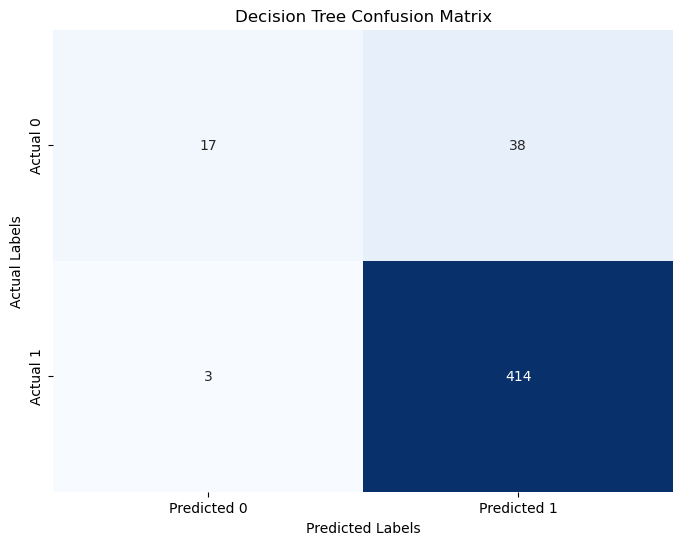

In [93]:
y_pred = best_decision_tree.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# Convert the classification report to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Print the classification report in a structured tabular format
print("\nClassification Report:\n")
print(class_report_df)

# Extract precision, recall, and f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output precision, recall, and f1_score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Decision Tree Confusion Matrix')
plt.show()

KS Statistic: 0.3552212775234358


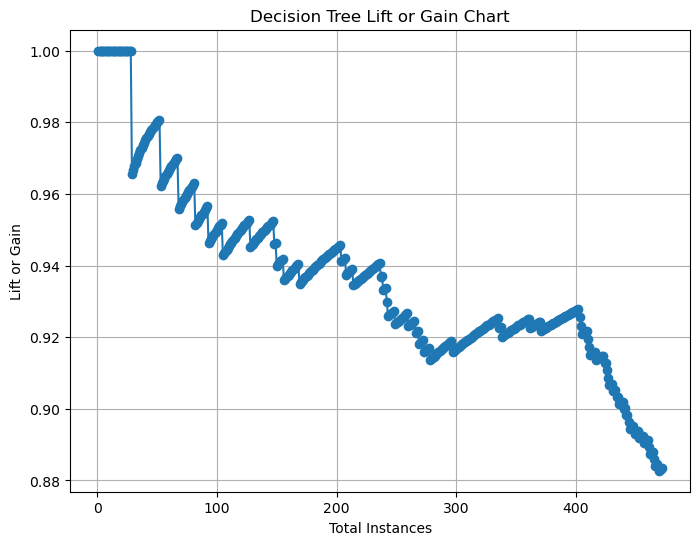

In [96]:
# Calculate the predicted probabilities for the positive class
y_prob2 = decision_tree.predict_proba(X_test)[:, 1]  # Use the probability of the positive class

# Create ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob2)

# Calculate the KS statistic
ks = max(tpr - fpr)

print("KS Statistic:", ks)
# Sort both 'y_prob' and 'y_test' based on 'y_prob'
sorted_indices = np.argsort(y_prob2)[::-1]
sorted_probabilities = y_prob2[sorted_indices]
sorted_labels = y_test.iloc[sorted_indices]  # Use .iloc to sort 'y_test'

# Calculate the cumulative number of positive instances and the total number of instances
cumulative_positives = np.cumsum(sorted_labels)
total_instances = np.arange(1, len(y_test) + 1)

# Calculate the lift or gain
lift = cumulative_positives / total_instances

# Plot the lift or gain chart
plt.figure(figsize=(8, 6))
plt.plot(total_instances, lift, marker='o', linestyle='-')
plt.xlabel("Total Instances")
plt.ylabel("Lift or Gain")
plt.title("Decision Tree Lift or Gain Chart")
plt.grid(True)
plt.show()

In [95]:
# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_threshold = None
best_mean_accuracy = 0.0

thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

# Define your select_features_by_correlation function based on your dataset

for threshold in thresholds:
    # Apply threshold to select features
    selected_features = select_features_by_correlation(student_academic_model, threshold)    
    # Perform k-fold cross-validation
    scores = cross_val_score(best_decision_tree, student_academic_model[selected_features], student_academic_model["Target"], cv=kf, scoring='accuracy', error_score='raise')
    
    # Calculate mean accuracy
    mean_accuracy = np.mean(scores)
    
    # Check if this threshold gives better accuracy
    if mean_accuracy > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best Mean Accuracy: {best_mean_accuracy:.2f}")

Best Threshold: 0.05
Best Mean Accuracy: 1.00


### Random Forests

In [97]:
# Create the Random Forest classifier
random_forest = RandomForestClassifier()

# Define the hyperparameter grid for optimization
param_grid3 = {
    'n_estimators': [100, 200, 300],         
    'criterion': ['gini', 'entropy'],        
    'max_depth': [None, 5, 10, 20],          
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4]            
}

grid_search3 = GridSearchCV(estimator=random_forest, param_grid=param_grid3, cv=5, scoring='accuracy')
grid_search3.fit(X_train, y_train)

# Get the best hyperparameters
best_params3 = grid_search3.best_params_
print("Best Hyperparameters:", best_params3)

# Train the Random Forest classifier with the best hyperparameters
best_random_forest = RandomForestClassifier(**best_params3)
best_random_forest.fit(X_train, y_train)

y_train_pred5 = best_random_forest.predict(X_train)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred5)

print("Training Accuracy:", training_accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Training Accuracy: 0.9518181818181818


Accuracy on test set: 0.9004237288135594

Classification Report:

              precision    recall  f1-score     support
Class 0        0.785714  0.200000  0.318841   55.000000
Class 1        0.903930  0.992806  0.946286  417.000000
accuracy       0.900424  0.900424  0.900424    0.900424
macro avg      0.844822  0.596403  0.632563  472.000000
weighted avg   0.890155  0.900424  0.873172  472.000000

Precision: 0.9039301310043668
Recall: 0.9928057553956835
F1-Score: 0.9462857142857143


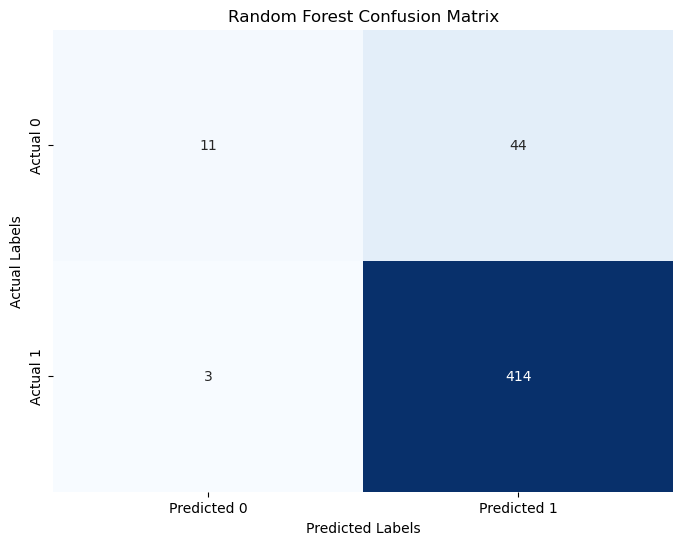

In [98]:
y_pred = best_random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# Convert the classification report to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Print the classification report in a structured tabular format
print("\nClassification Report:\n")
print(class_report_df)

# Extract precision, recall, and f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output precision, recall, and f1_score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

KS Statistic: 0.4287333769348157


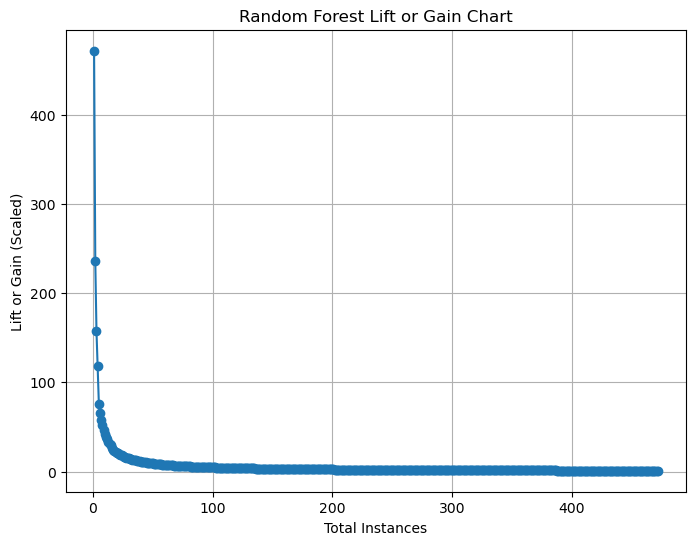

In [99]:
# Calculate the predicted probabilities for the positive class
y_prob3 = best_random_forest.predict_proba(X_test)[:, 1]  # Use the probability of the positive class

# Create ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob3)

# Calculate the KS statistic
ks = max(tpr - fpr)

print("KS Statistic:", ks)

# Sort both 'y_prob' and 'y_test' based on 'y_prob'
sorted_indices = np.argsort(y_prob3)[::-1]
sorted_probabilities = y_prob3[sorted_indices]
sorted_labels = y_test.iloc[sorted_indices]  # Use .iloc to sort 'y_test'

# Calculate the cumulative number of positive instances and the total number of instances
cumulative_positives = np.cumsum(sorted_labels)
total_instances = np.arange(1, len(y_test) + 1)

# Calculate the lift or gain as a ratio to the baseline
baseline_lift = total_instances / len(y_test)  # Baseline lift with values from 0 to 1.0

# Calculate the actual lift by dividing cumulative_positives by total_instances
lift = cumulative_positives / total_instances

# Plot the lift or gain chart
plt.figure(figsize=(8, 6))
plt.plot(total_instances, lift / baseline_lift, marker='o', linestyle='-')  # Scale lift by baseline_lift
plt.xlabel("Total Instances")
plt.ylabel("Lift or Gain (Scaled)")
plt.title("Random Forest Lift or Gain Chart")
plt.grid(True)
plt.show()

KS Statistic: 0.4287333769348157


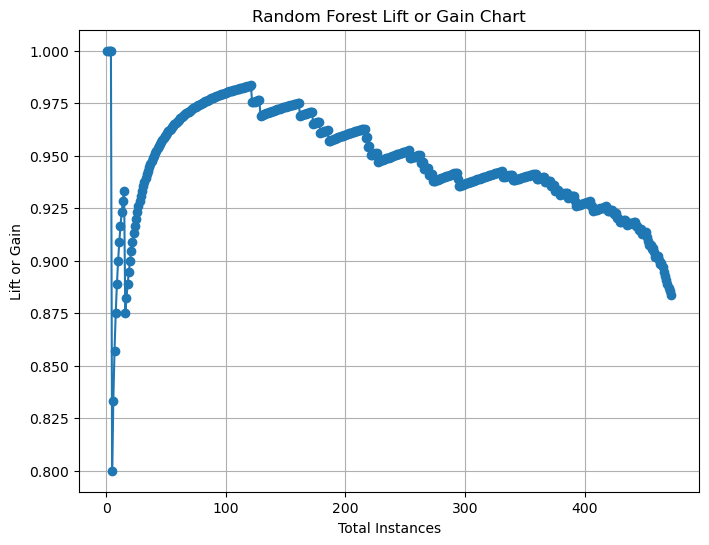

In [100]:
# Calculate the predicted probabilities for the positive class
y_prob3 = best_random_forest.predict_proba(X_test)[:, 1]  # Use the probability of the positive class

# Create ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob3)

# Calculate the KS statistic
ks = max(tpr - fpr)

print("KS Statistic:", ks)
# Sort both 'y_prob' and 'y_test' based on 'y_prob'
sorted_indices = np.argsort(y_prob3)[::-1]
sorted_probabilities = y_prob3[sorted_indices]
sorted_labels = y_test.iloc[sorted_indices]  # Use .iloc to sort 'y_test'

# Calculate the cumulative number of positive instances and the total number of instances
cumulative_positives = np.cumsum(sorted_labels)
total_instances = np.arange(1, len(y_test) + 1)

# Calculate the lift or gain
lift = cumulative_positives / total_instances

# Plot the lift or gain chart
plt.figure(figsize=(8, 6))
plt.plot(total_instances, lift, marker='o', linestyle='-')
plt.xlabel("Total Instances")
plt.ylabel("Lift or Gain")
plt.title("Random Forest Lift or Gain Chart")
plt.grid(True)
plt.show()

In [101]:
# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_threshold = None
best_mean_accuracy = 0.0

thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

# Define your select_features_by_correlation function based on your dataset

for threshold in thresholds:
    # Apply threshold to select features
    selected_features = select_features_by_correlation(student_academic_model, threshold)    
    # Perform k-fold cross-validation
    scores = cross_val_score(best_random_forest, student_academic_model[selected_features], student_academic_model["Target"], cv=kf, scoring='accuracy', error_score='raise')
    
    # Calculate mean accuracy
    mean_accuracy = np.mean(scores)
    
    # Check if this threshold gives better accuracy
    if mean_accuracy > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best Mean Accuracy: {best_mean_accuracy:.2f}")

Best Threshold: 0.05
Best Mean Accuracy: 1.00


### Multinomial Bayes

In [102]:
from sklearn.naive_bayes import MultinomialNB

# Multi-nomial Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Define the hyperparameter grid for optimization
param_grid4 = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],     # Smoothing parameter (alpha)
    'fit_prior': [True, False]              # Flag to learn class priors from the data (True) or use a uniform prior (False)
}

# Perform GridSearchCV to find the best hyperparameters
grid_search4 = GridSearchCV(estimator=mnb, param_grid=param_grid4, cv=5, scoring='accuracy')
grid_search4.fit(X_train, y_train)

# Get the best hyperparameters
best_params4 = grid_search4.best_params_
best_params4
print(best_params4)

# Create the MultinomialNB classifier with the best hyperparameters
best_multinomial_nb = MultinomialNB(alpha=best_params4['alpha'], fit_prior=best_params4['fit_prior'])

# Train the classifier on the training data
best_multinomial_nb.fit(X_train, y_train)

y_train_pred6 = best_multinomial_nb.predict(X_train)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred6)

print("Training Accuracy:", training_accuracy)

{'alpha': 0.1, 'fit_prior': True}
Training Accuracy: 0.8954545454545455


Accuracy on test set: 0.8898305084745762

Classification Report:

              precision    recall  f1-score     support
Class 0        0.636364  0.127273  0.212121   55.000000
Class 1        0.895879  0.990408  0.940774  417.000000
accuracy       0.889831  0.889831  0.889831    0.889831
macro avg      0.766121  0.558840  0.576448  472.000000
weighted avg   0.865638  0.889831  0.855868  472.000000

Precision: 0.89587852494577
Recall: 0.9904076738609112
F1-Score: 0.9407744874715261


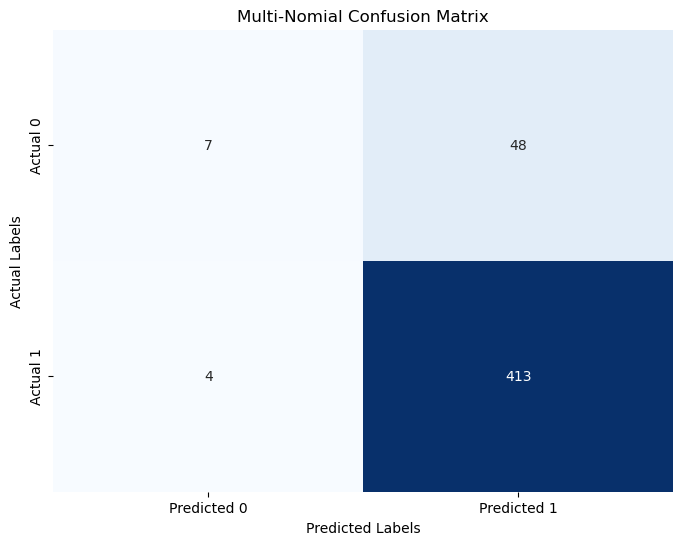

In [103]:
# Make predictions on the test set
y_pred = best_multinomial_nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# Convert the classification report to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Print the classification report in a structured tabular format
print("\nClassification Report:\n")
print(class_report_df)

# Extract precision, recall, and f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output precision, recall, and f1_score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Multi-Nomial Confusion Matrix')
plt.show()

KS Statistic: 0.4804883366034445


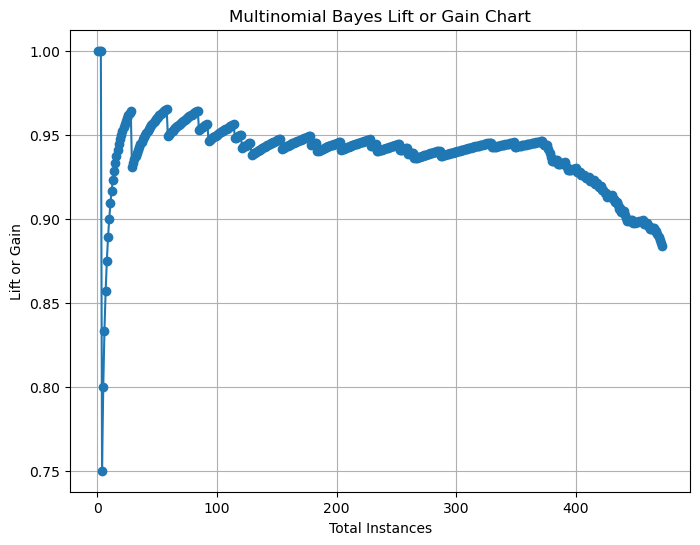

In [106]:
# Calculate the predicted probabilities for the positive class
y_prob4 = best_multinomial_nb.predict_proba(X_test)[:, 1]  # Use the probability of the positive class

# Create ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob4)

# Calculate the KS statistic
ks = max(tpr - fpr)

print("KS Statistic:", ks)
# Sort both 'y_prob' and 'y_test' based on 'y_prob'
sorted_indices = np.argsort(y_prob4)[::-1]
sorted_probabilities = y_prob4[sorted_indices]
sorted_labels = y_test.iloc[sorted_indices]  # Use .iloc to sort 'y_test'

# Calculate the cumulative number of positive instances and the total number of instances
cumulative_positives = np.cumsum(sorted_labels)
total_instances = np.arange(1, len(y_test) + 1)

# Calculate the lift or gain
lift = cumulative_positives / total_instances

# Plot the lift or gain chart
plt.figure(figsize=(8, 6))
plt.plot(total_instances, lift, marker='o', linestyle='-')
plt.xlabel("Total Instances")
plt.ylabel("Lift or Gain")
plt.title("Multinomial Bayes Lift or Gain Chart")
plt.grid(True)
plt.show()

In [107]:
# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_threshold = None
best_mean_accuracy = 0.0

thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

# Define your select_features_by_correlation function based on your dataset

for threshold in thresholds:
    # Apply threshold to select features
    selected_features = select_features_by_correlation(student_academic_model, threshold)    
    # Perform k-fold cross-validation
    scores = cross_val_score(best_multinomial_nb, student_academic_model[selected_features], student_academic_model["Target"], cv=kf, scoring='accuracy', error_score='raise')
    
    # Calculate mean accuracy
    mean_accuracy = np.mean(scores)
    
    # Check if this threshold gives better accuracy
    if mean_accuracy > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best Mean Accuracy: {best_mean_accuracy:.2f}")

Best Threshold: 0.05
Best Mean Accuracy: 0.92


### Logistic Regression

In [108]:

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Train the model on training data
logistic_regression.fit(X_train, y_train)

# Define the hyperparameter grid for optimisation
param_grid5 = {
    'C': [0.1, 1.0, 10.0],                  
    'penalty': ['l1', 'l2'],                
    'solver': ['liblinear', 'lbfgs']        
}

# Perform GirdSearchCV to find the best hyperparameters
grid_search5 = GridSearchCV(estimator=logistic_regression, param_grid=param_grid5, cv=5, scoring='accuracy')
grid_search5.fit(X_train, y_train)

# Get the best hyperparameters
best_params5 = grid_search5.best_params_
print("Best Hyperparameters:", best_params5)

# Train the Logistic Regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params5)
best_logistic_regression.fit(X_train, y_train)

y_train_pred6 = best_logistic_regression.predict(X_train)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred6)

print("Training Accuracy:", training_accuracy)

Best Hyperparameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Training Accuracy: 0.9090909090909091


C:\Users\rgs88\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rgs88\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rgs88\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rgs88\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Value

Accuracy on test set: 0.8898305084745762

Classification Report:

              precision    recall  f1-score     support
Class 0        0.636364  0.127273  0.212121   55.000000
Class 1        0.895879  0.990408  0.940774  417.000000
accuracy       0.889831  0.889831  0.889831    0.889831
macro avg      0.766121  0.558840  0.576448  472.000000
weighted avg   0.865638  0.889831  0.855868  472.000000

Precision: 0.9088888888888889
Recall: 0.9808153477218226
F1-Score: 0.9434832756632064


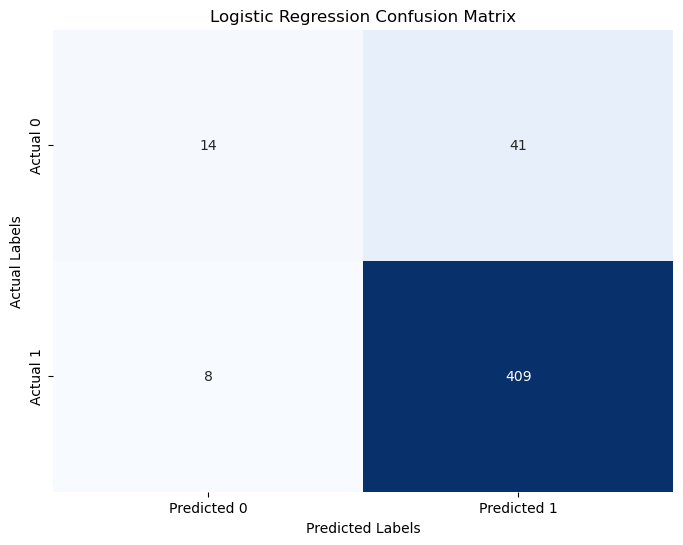

In [109]:
y_pred1 = best_logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# Convert the classification report to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Print the classification report in a structured tabular format
print("\nClassification Report:\n")
print(class_report_df)

# Extract precision, recall, and f1_score
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

# Output precision, recall, and f1_score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

KS Statistic: 0.4209287115761936


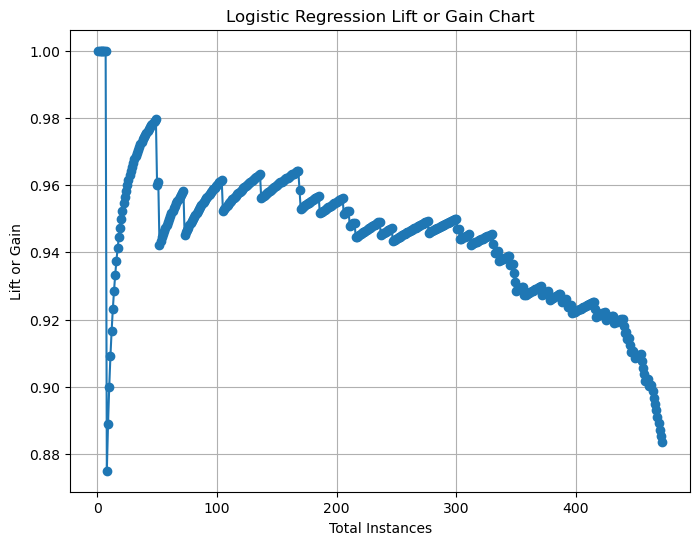

In [113]:
# Calculate the predicted probabilities for the positive class
y_prob5 = best_logistic_regression.predict_proba(X_test)[:, 1]  # Use the probability of the positive class

# Create ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob5)

# Calculate the KS statistic
ks = max(tpr - fpr)

print("KS Statistic:", ks)
# Sort both 'y_prob' and 'y_test' based on 'y_prob'
sorted_indices = np.argsort(y_prob5)[::-1]
sorted_probabilities = y_prob5[sorted_indices]
sorted_labels = y_test.iloc[sorted_indices]  # Use .iloc to sort 'y_test'

# Calculate the cumulative number of positive instances and the total number of instances
cumulative_positives = np.cumsum(sorted_labels)
total_instances = np.arange(1, len(y_test) + 1)

# Calculate the lift or gain
lift = cumulative_positives / total_instances

# Plot the lift or gain chart
plt.figure(figsize=(8, 6))
plt.plot(total_instances, lift, marker='o', linestyle='-')
plt.xlabel("Total Instances")
plt.ylabel("Lift or Gain")
plt.title("Logistic Regression Lift or Gain Chart")
plt.grid(True)
plt.show()

In [114]:
# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_threshold = None
best_mean_accuracy = 0.0

thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

# Define your select_features_by_correlation function based on your dataset

for threshold in thresholds:
    # Apply threshold to select features
    selected_features = select_features_by_correlation(student_academic_model, threshold)    
    # Perform k-fold cross-validation
    scores = cross_val_score(best_random_forest, student_academic_model[selected_features], student_academic_model["Target"], cv=kf, scoring='accuracy', error_score='raise')
    
    # Calculate mean accuracy
    mean_accuracy = np.mean(scores)
    
    # Check if this threshold gives better accuracy
    if mean_accuracy > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best Mean Accuracy: {best_mean_accuracy:.2f}")

Best Threshold: 0.05
Best Mean Accuracy: 1.00


In [115]:

# Define the labels for each ROC curve (e.g., "Model 1", "Model 2", etc.)
curve_labels = ["KNN", "SVM", "Decision Tree", "Random Forest", "Multinomial Naive Bayes", "Logistic Regression"]

# Define the colors for each ROC curve (you can change these to your preference)
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Initialize the figure
plt.figure(figsize=(8, 6))

# List of y_prob arrays for each model
y_probs_list = [y_prob, y_prob1, y_prob2, y_prob3, y_prob4, y_prob5]

# Plot each ROC curve
for i, y_prob in enumerate(y_probs_list):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{curve_labels[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')

# Add a legend
plt.legend(loc='lower right')

# Display the ROC curves
plt.show()

NameError: name 'y_prob1' is not defined

<Figure size 800x600 with 0 Axes>

In [140]:
best_random_forest
predictions = best_random_forest.predict(student_academic_prediction)

student_academic_prediction['Predicted_Outcome'] = predictions

C:\Users\rgs88\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\rgs88\AppData\Local\Temp\ipykernel_25136\1927557786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_academic_prediction['Predicted_Outcome'] = predictions


In [141]:
student_academic_prediction.head(20)

Application mode  Debtor  Tuition fees up to date  Gender  \
0                  9       0                        1       0   
1                  1       0                        1       0   
2                  9       0                        1       0   
3                  1       1                        1       0   
4                  1       0                        1       0   
5                  8       0                        1       1   
6                 15       0                        1       1   
7                  1       0                        0       1   
8                  8       0                        1       0   
9                  1       0                        1       0   
10                 1       0                        1       0   
11                 1       0                        1       0   
12                 8       0                        1       1   
13                 8       0                        1       1   
14                14       0                        1       1   
15                12       0                        1       1   
16                 8       0                        1       1   
17                 8       0                        1       1   
18                 1       0                        1       1   
19                14       1                        1       1   

    Scholarship holder  Age at enrollment  \
0                    0                 18   
1                    0                 18   
2                    0                 20   
3                    1                 18   
4                    0                 18   
5                    0                 19   
6                    0                 21   
7                    0                 18   
8                    0                 24   
9                    1                 19   
10                   1                 20   
11                   0                 18   
12                   1                 19   
13                   0                 19   
14                   0                 24   
15                   0                 26   
16                   0                 18   
17                   0                 18   
18                   0                 23   
19                   0                 18   

    Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                     1                         12.000000   
1                                     6                         11.666667   
2                                     7                         11.437500   
3                                     5                         11.600000   
4                                     5                         12.666667   
5                                     6                         12.933333   
6                                     5                         11.857143   
7                                     3                         11.333333   
8                                     2                         11.500000   
9                                     6                         11.833333   
10                                    4                         14.000000   
11                                    0                          0.000000   
12                                    0                          0.000000   
13                                    5                         11.400000   
14                                    0                          0.000000   
15                                    6                         12.000000   
16                                    0                          0.000000   
17                                    5                         12.000000   
18                                    4                         14.000000   
19                                    2                         10.000000   

    Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade) 

In [142]:
student_academic_prediction.Predicted_Outcome.value_counts()

1    712
0     82
Name: Predicted_Outcome, dtype: int64

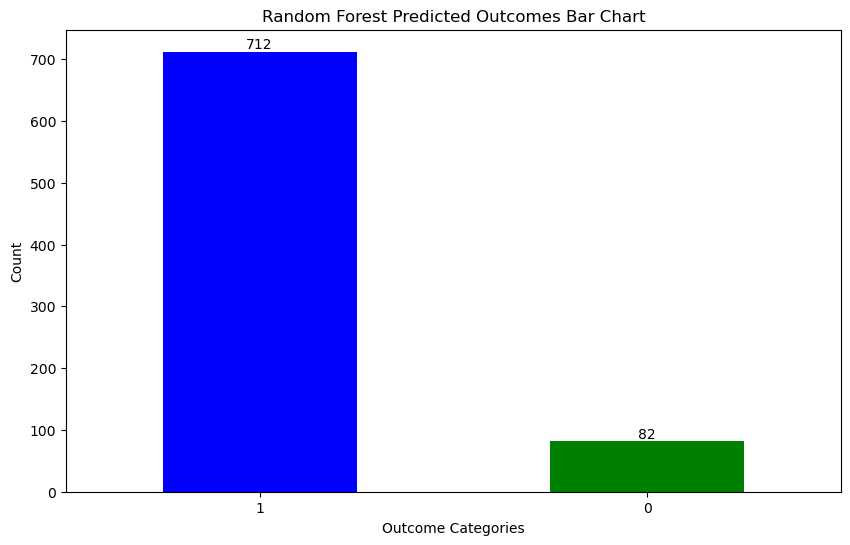

In [159]:
# Get the value counts
value_counts = student_academic_prediction['Predicted_Outcome'].value_counts()

# Define colors and labels
colors = ['blue', 'green', 'red', 'purple']  # You can customize the colors
labels = value_counts.index  # Get unique categories as labels

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = value_counts.plot(kind="bar", color=colors)
ax.set_xticklabels(labels, rotation=0)  # Set custom labels for x-axis

# Add labels and title
plt.xlabel("Outcome Categories")
plt.ylabel("Count")
plt.title("Random Forest Predicted Outcomes Bar Chart")

# Add numbers on top of each bar
for i, v in enumerate(value_counts):
    ax.text(i, v + 5, str(v), color='black', ha='center')

# Show the plot
plt.show()

In [123]:
student_academic.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [151]:
student_academic_prediction_1 = student_academic_prediction_1.drop(columns = {"Predicted_Outcome"})

In [152]:
best_logistic_regression
predictions_1 = best_logistic_regression.predict(student_academic_prediction_1)

student_academic_prediction_1['Predicted_Outcome'] = predictions_1

C:\Users\rgs88\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [153]:
student_academic_prediction_1.Predicted_Outcome.value_counts()

1    726
0     68
Name: Predicted_Outcome, dtype: int64

In [154]:
student_academic_prediction_1.head(20)

Application mode  Debtor  Tuition fees up to date  Gender  \
0                  9       0                        1       0   
1                  1       0                        1       0   
2                  9       0                        1       0   
3                  1       1                        1       0   
4                  1       0                        1       0   
5                  8       0                        1       1   
6                 15       0                        1       1   
7                  1       0                        0       1   
8                  8       0                        1       0   
9                  1       0                        1       0   
10                 1       0                        1       0   
11                 1       0                        1       0   
12                 8       0                        1       1   
13                 8       0                        1       1   
14                14       0                        1       1   
15                12       0                        1       1   
16                 8       0                        1       1   
17                 8       0                        1       1   
18                 1       0                        1       1   
19                14       1                        1       1   

    Scholarship holder  Age at enrollment  \
0                    0                 18   
1                    0                 18   
2                    0                 20   
3                    1                 18   
4                    0                 18   
5                    0                 19   
6                    0                 21   
7                    0                 18   
8                    0                 24   
9                    1                 19   
10                   1                 20   
11                   0                 18   
12                   1                 19   
13                   0                 19   
14                   0                 24   
15                   0                 26   
16                   0                 18   
17                   0                 18   
18                   0                 23   
19                   0                 18   

    Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                     1                         12.000000   
1                                     6                         11.666667   
2                                     7                         11.437500   
3                                     5                         11.600000   
4                                     5                         12.666667   
5                                     6                         12.933333   
6                                     5                         11.857143   
7                                     3                         11.333333   
8                                     2                         11.500000   
9                                     6                         11.833333   
10                                    4                         14.000000   
11                                    0                          0.000000   
12                                    0                          0.000000   
13                                    5                         11.400000   
14                                    0                          0.000000   
15                                    6                         12.000000   
16                                    0                          0.000000   
17                                    5                         12.000000   
18                                    4                         14.000000   
19                                    2                         10.000000   

    Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade) 

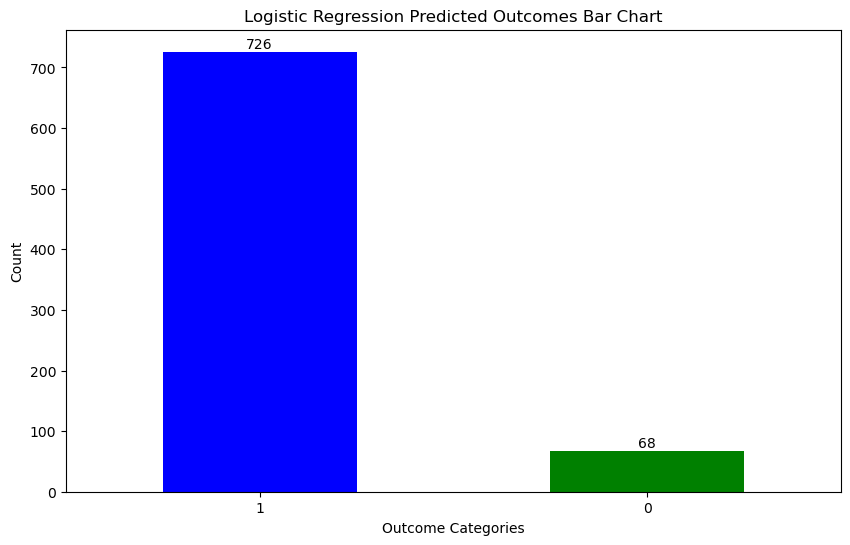

In [158]:
# Get the value counts
value_counts = student_academic_prediction_1['Predicted_Outcome'].value_counts()

# Define colors and labels
colors = ['blue', 'green', 'red', 'purple']  # You can customize the colors
labels = value_counts.index  # Get unique categories as labels

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = value_counts.plot(kind="bar", color=colors)
ax.set_xticklabels(labels, rotation=0)  # Set custom labels for x-axis

# Add labels and title
plt.xlabel("Outcome Categories")
plt.ylabel("Count")
plt.title("Logistic Regression Predicted Outcomes Bar Chart")

# Add numbers on top of each bar
for i, v in enumerate(value_counts):
    ax.text(i, v + 5, str(v), color='black', ha='center')

# Show the plot
plt.show()

## Summary

- Performing outlier removal does not increase model accuracy. This is because a lot of these outliers are valid results, and will also be in the test data too. We refrain from removing outliers.
- Standardisation increases model accuracy.